In [7]:
import glob
import pandas as pd
import numpy as np

file_name_list = glob.glob("Data/*.csv")

feature_set = ['wellName','DEPT', 'BS', 'CALI', 'DENS', 'DTC', 'GR', 'NEUT', 'PEF', 'RESD', 'RESM', 'RESS', 'TVD']

file_list = []

for file in file_name_list:
    df = pd.read_csv(file, index_col=None, skiprows=[1])
    file_list.append(df[feature_set])

In [8]:
import matplotlib.pyplot as plt

def plt_this(y):
    plt.plot(y)
    plt.show()


In [9]:
import os

def save_res(dept, pred_y, err, well, algo_name):
    res_path = "Results/%s"  %well
    if not os.path.isdir(res_path):
        os.makedirs(res_path)
        
    result = pd.DataFrame({'DEPT': dept,
                           'Pred_DTC': pred_y})
    result.to_csv('%s/%s.csv' %(res_path, algo_name))
    
    score = pd.DataFrame({'ERROR' : [err]})
    score.to_csv('%s/%s_score.csv' %(res_path, algo_name))

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import explained_variance_score, r2_score

def cross_val(clf, algo_name, feature_set=['DEPT', 'BS', 'CALI', 'DENS', 'GR', 'NEUT', 'PEF', 'RESD', 'RESM', 'RESS', 'TVD']):
    
    wells = []
    err_list = []

    for i in range(len(file_list)):
        test_df = file_list[i]
        wells.append(test_df.iloc[0,0])
        print('%s : %s' %(i, wells[i]))

        train_list = file_list.copy()
        train_list.pop(i)
        train_df = pd.concat(train_list)

        test_x = test_df[feature_set].values
        test_y = test_df[['DTC']].values
        test_y = test_y.ravel()
        
        train_X = train_df[feature_set].values
        train_y = train_df[['DTC']].values
        train_y = train_y.ravel()
        
        # feature scaling
        scaler = StandardScaler()
        scaler.fit_transform(train_X)
        scaler.transform(test_x)

        # training
        mdl = clf()
        mdl.fit(train_X, train_y)
        
        # testing
        pred_y = mdl.predict(test_x)
    
        # error
#         abs_error = np.divide((np.abs(np.subtract(test_y, pred_y))), test_y)
        
#         plt_this(abs_error)
#         plt_this(pred_y)
#         plt_this(test_y)
            
#         err = explained_variance_score(test_y, pred_y)
        err = r2_score(test_y, pred_y)
        
        err_list.append(err)
        
        # save results
        save_res(test_x[:,0], pred_y, err, wells[i], algo_name)

    print()

    avg_err = np.mean(err_list)

    for i in range(len(wells)):
        print('Test score on %s : %s' %(wells[i], err_list[i]))

    print()
    print('Average algorithm score: %s' %avg_err)


# Linear regression

In [11]:
from sklearn.linear_model import LinearRegression

feature_set = ['DEPT', 'BS', 'CALI', 'DENS', 'RESD', 'RESM'] #0.372

cross_val(LinearRegression, 'Linear regression', feature_set)

0 : Cheal-A12
1 : Cheal-G3
2 : Cheal-B8
3 : Cheal-G2
4 : Cheal-A10
5 : Cheal-C3
6 : Cheal-G1
7 : Cheal-A11
8 : Cheal-C4

Test score on Cheal-A12 : 0.7929567095598402
Test score on Cheal-G3 : 0.4857517750978849
Test score on Cheal-B8 : 0.8162805159733997
Test score on Cheal-G2 : 0.7466208463146158
Test score on Cheal-A10 : 0.6955932750522589
Test score on Cheal-C3 : 0.5887520220557325
Test score on Cheal-G1 : 0.7541170814086443
Test score on Cheal-A11 : -2.8890320774886575
Test score on Cheal-C4 : 0.7564174102398002

Average algorithm score: 0.3052730620237243


# Random Forrest

In [12]:
from sklearn.ensemble import RandomForestRegressor

cross_val(RandomForestRegressor, 'Random forrest')

0 : Cheal-A12
1 : Cheal-G3
2 : Cheal-B8
3 : Cheal-G2
4 : Cheal-A10
5 : Cheal-C3
6 : Cheal-G1
7 : Cheal-A11
8 : Cheal-C4

Test score on Cheal-A12 : 0.8303540864735811
Test score on Cheal-G3 : 0.8154776233593793
Test score on Cheal-B8 : 0.8862567517091986
Test score on Cheal-G2 : 0.819321000389548
Test score on Cheal-A10 : 0.7410138608162199
Test score on Cheal-C3 : 0.719488748694749
Test score on Cheal-G1 : 0.7290877638857669
Test score on Cheal-A11 : 0.8632665871125191
Test score on Cheal-C4 : 0.7948026101907077

Average algorithm score: 0.7998965591812967


# Gradient Boosting

In [13]:
from lightgbm import LGBMRegressor

cross_val(LGBMRegressor, 'Gradient boosting')

0 : Cheal-A12


/Users/Ali/anaconda3/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


1 : Cheal-G3
2 : Cheal-B8
3 : Cheal-G2
4 : Cheal-A10
5 : Cheal-C3
6 : Cheal-G1
7 : Cheal-A11
8 : Cheal-C4

Test score on Cheal-A12 : 0.8676899930722775
Test score on Cheal-G3 : 0.899004907544544
Test score on Cheal-B8 : 0.9109146288277108
Test score on Cheal-G2 : 0.8711370473371596
Test score on Cheal-A10 : 0.817540613529717
Test score on Cheal-C3 : 0.8005543093009729
Test score on Cheal-G1 : 0.7885271499752097
Test score on Cheal-A11 : 0.8975993272516607
Test score on Cheal-C4 : 0.8324517721115686

Average algorithm score: 0.8539355276612022


# SVR

In [ ]:
from sklearn.svm import SVR

cross_val(SVR, 'Support vector machine')

0 : Cheal-A12


# XGBoost

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import explained_variance_score, r2_score
from xgboost import plot_tree
import matplotlib.pyplot as plt


def cross_val(clf, algo_name, feature_set=['DEPT', 'BS', 'CALI', 'DENS', 'GR', 'NEUT', 'PEF', 'RESD', 'RESM', 'RESS', 'TVD']):
    
    wells = []
    err_list = []

    for i in range(len(file_list)):
        test_df = file_list[i]
        wells.append(test_df.iloc[0,0])
        print('%s : %s' %(i, wells[i]))

        train_list = file_list.copy()
        train_list.pop(i)
        train_df = pd.concat(train_list)

        test_x = test_df[feature_set].values
        test_y = test_df[['DTC']].values
        test_y = test_y.ravel()
        
        train_X = train_df[feature_set].values
        train_y = train_df[['DTC']].values
        train_y = train_y.ravel()
        
        # feature scaling
        scaler = StandardScaler()
        scaler.fit_transform(train_X)
        scaler.transform(test_x)

        # training
        mdl = clf()
        mdl.fit(train_X, train_y)
        
        plot_tree(mdl, rankdir='LR')
#         plt.show()
        fig = plt.gcf()
        fig.set_size_inches(150, 100)
#         fig.savefig('tree.png')
        fig.show()

        # testing
        pred_y = mdl.predict(test_x)
    
        # error
#         abs_error = np.divide((np.abs(np.subtract(test_y, pred_y))), test_y)
        
#         plt_this(abs_error)
#         plt_this(pred_y)
#         plt_this(test_y)
            
#         err = explained_variance_score(test_y, pred_y)
        err = r2_score(test_y, pred_y)
        
        err_list.append(err)
        
        # save results
        save_res(test_x[:,0], pred_y, err, wells[i], algo_name)

    print()

    avg_err = np.mean(err_list)

    for i in range(len(wells)):
        print('Test score on %s : %s' %(wells[i], err_list[i]))

    print()
    print('Average algorithm score: %s' %avg_err)


0 : Cheal-A12


/Users/Ali/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


1 : Cheal-G3


/Users/Ali/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


2 : Cheal-B8


/Users/Ali/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


3 : Cheal-G2


/Users/Ali/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


4 : Cheal-A10


/Users/Ali/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


5 : Cheal-C3


/Users/Ali/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


6 : Cheal-G1


/Users/Ali/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


7 : Cheal-A11


/Users/Ali/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


8 : Cheal-C4


/Users/Ali/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "



Test score on Cheal-A12 : 0.8596268096165525
Test score on Cheal-G3 : 0.8646835325550417
Test score on Cheal-B8 : 0.9064686903290006
Test score on Cheal-G2 : 0.8381394863581825
Test score on Cheal-A10 : 0.7855014678050107
Test score on Cheal-C3 : 0.7730565141856706
Test score on Cheal-G1 : 0.7975678779036925
Test score on Cheal-A11 : 0.9004685161683958
Test score on Cheal-C4 : 0.8285316278649499

Average algorithm score: 0.8393382803096108


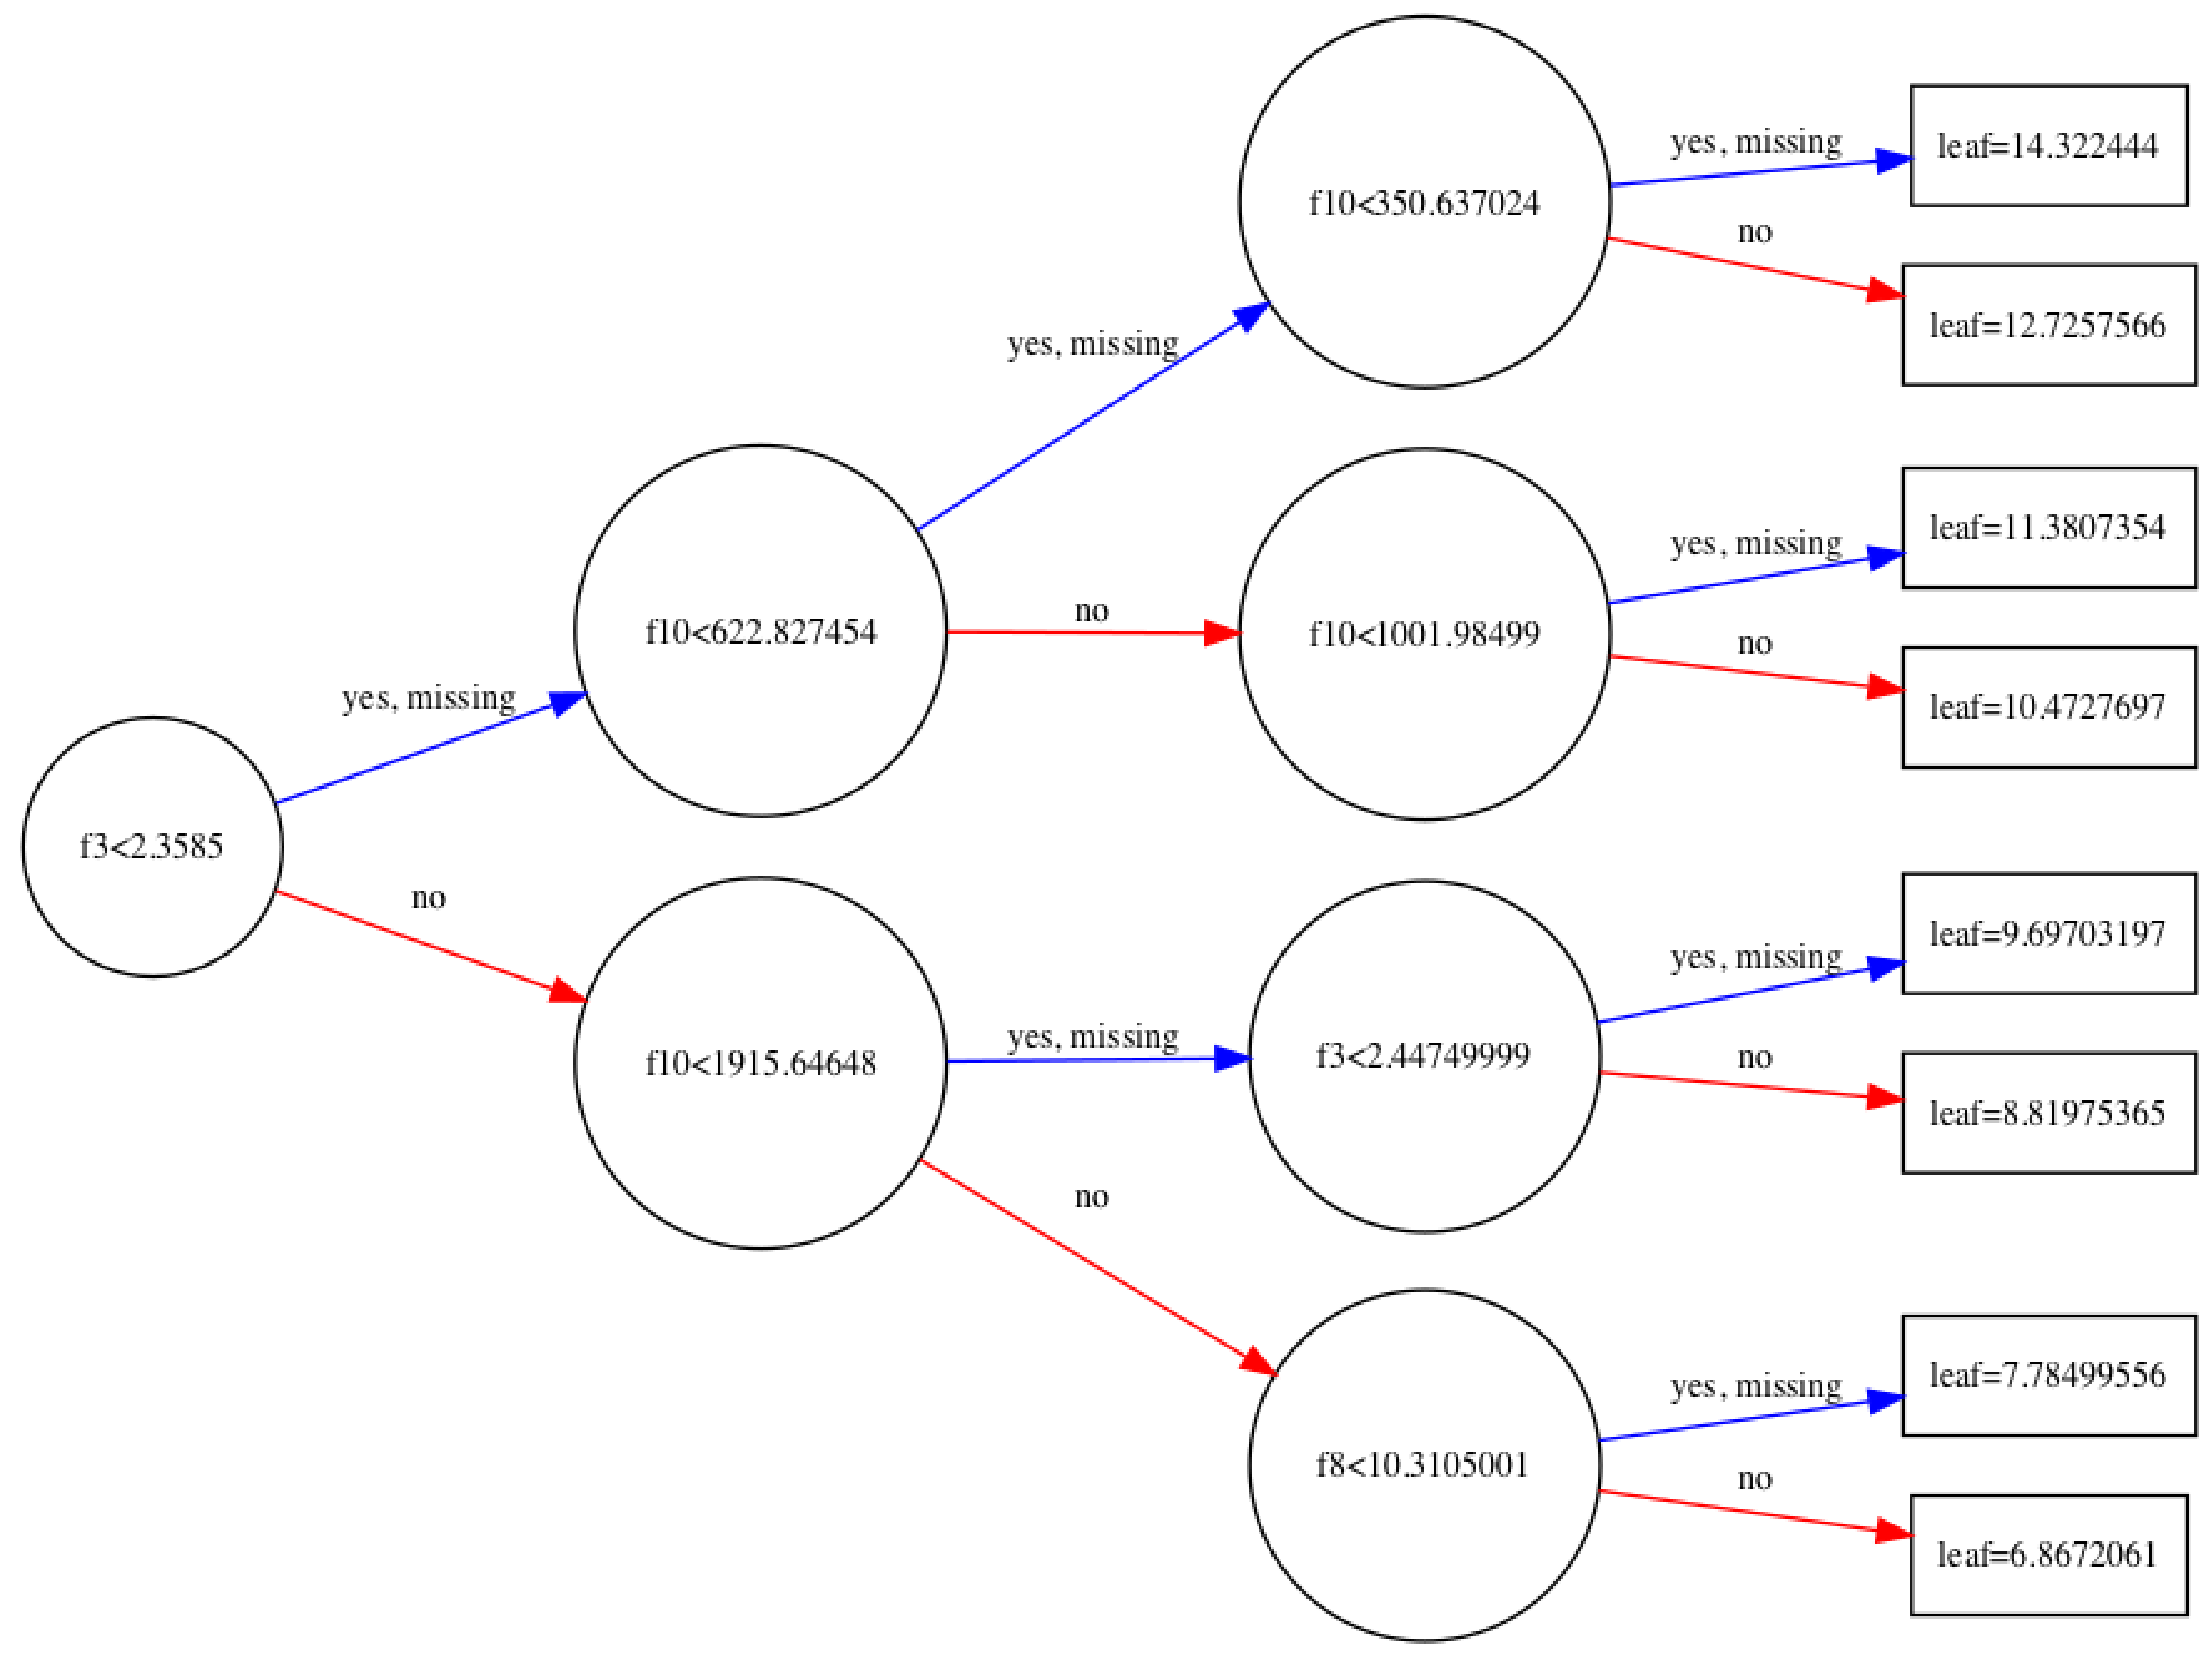

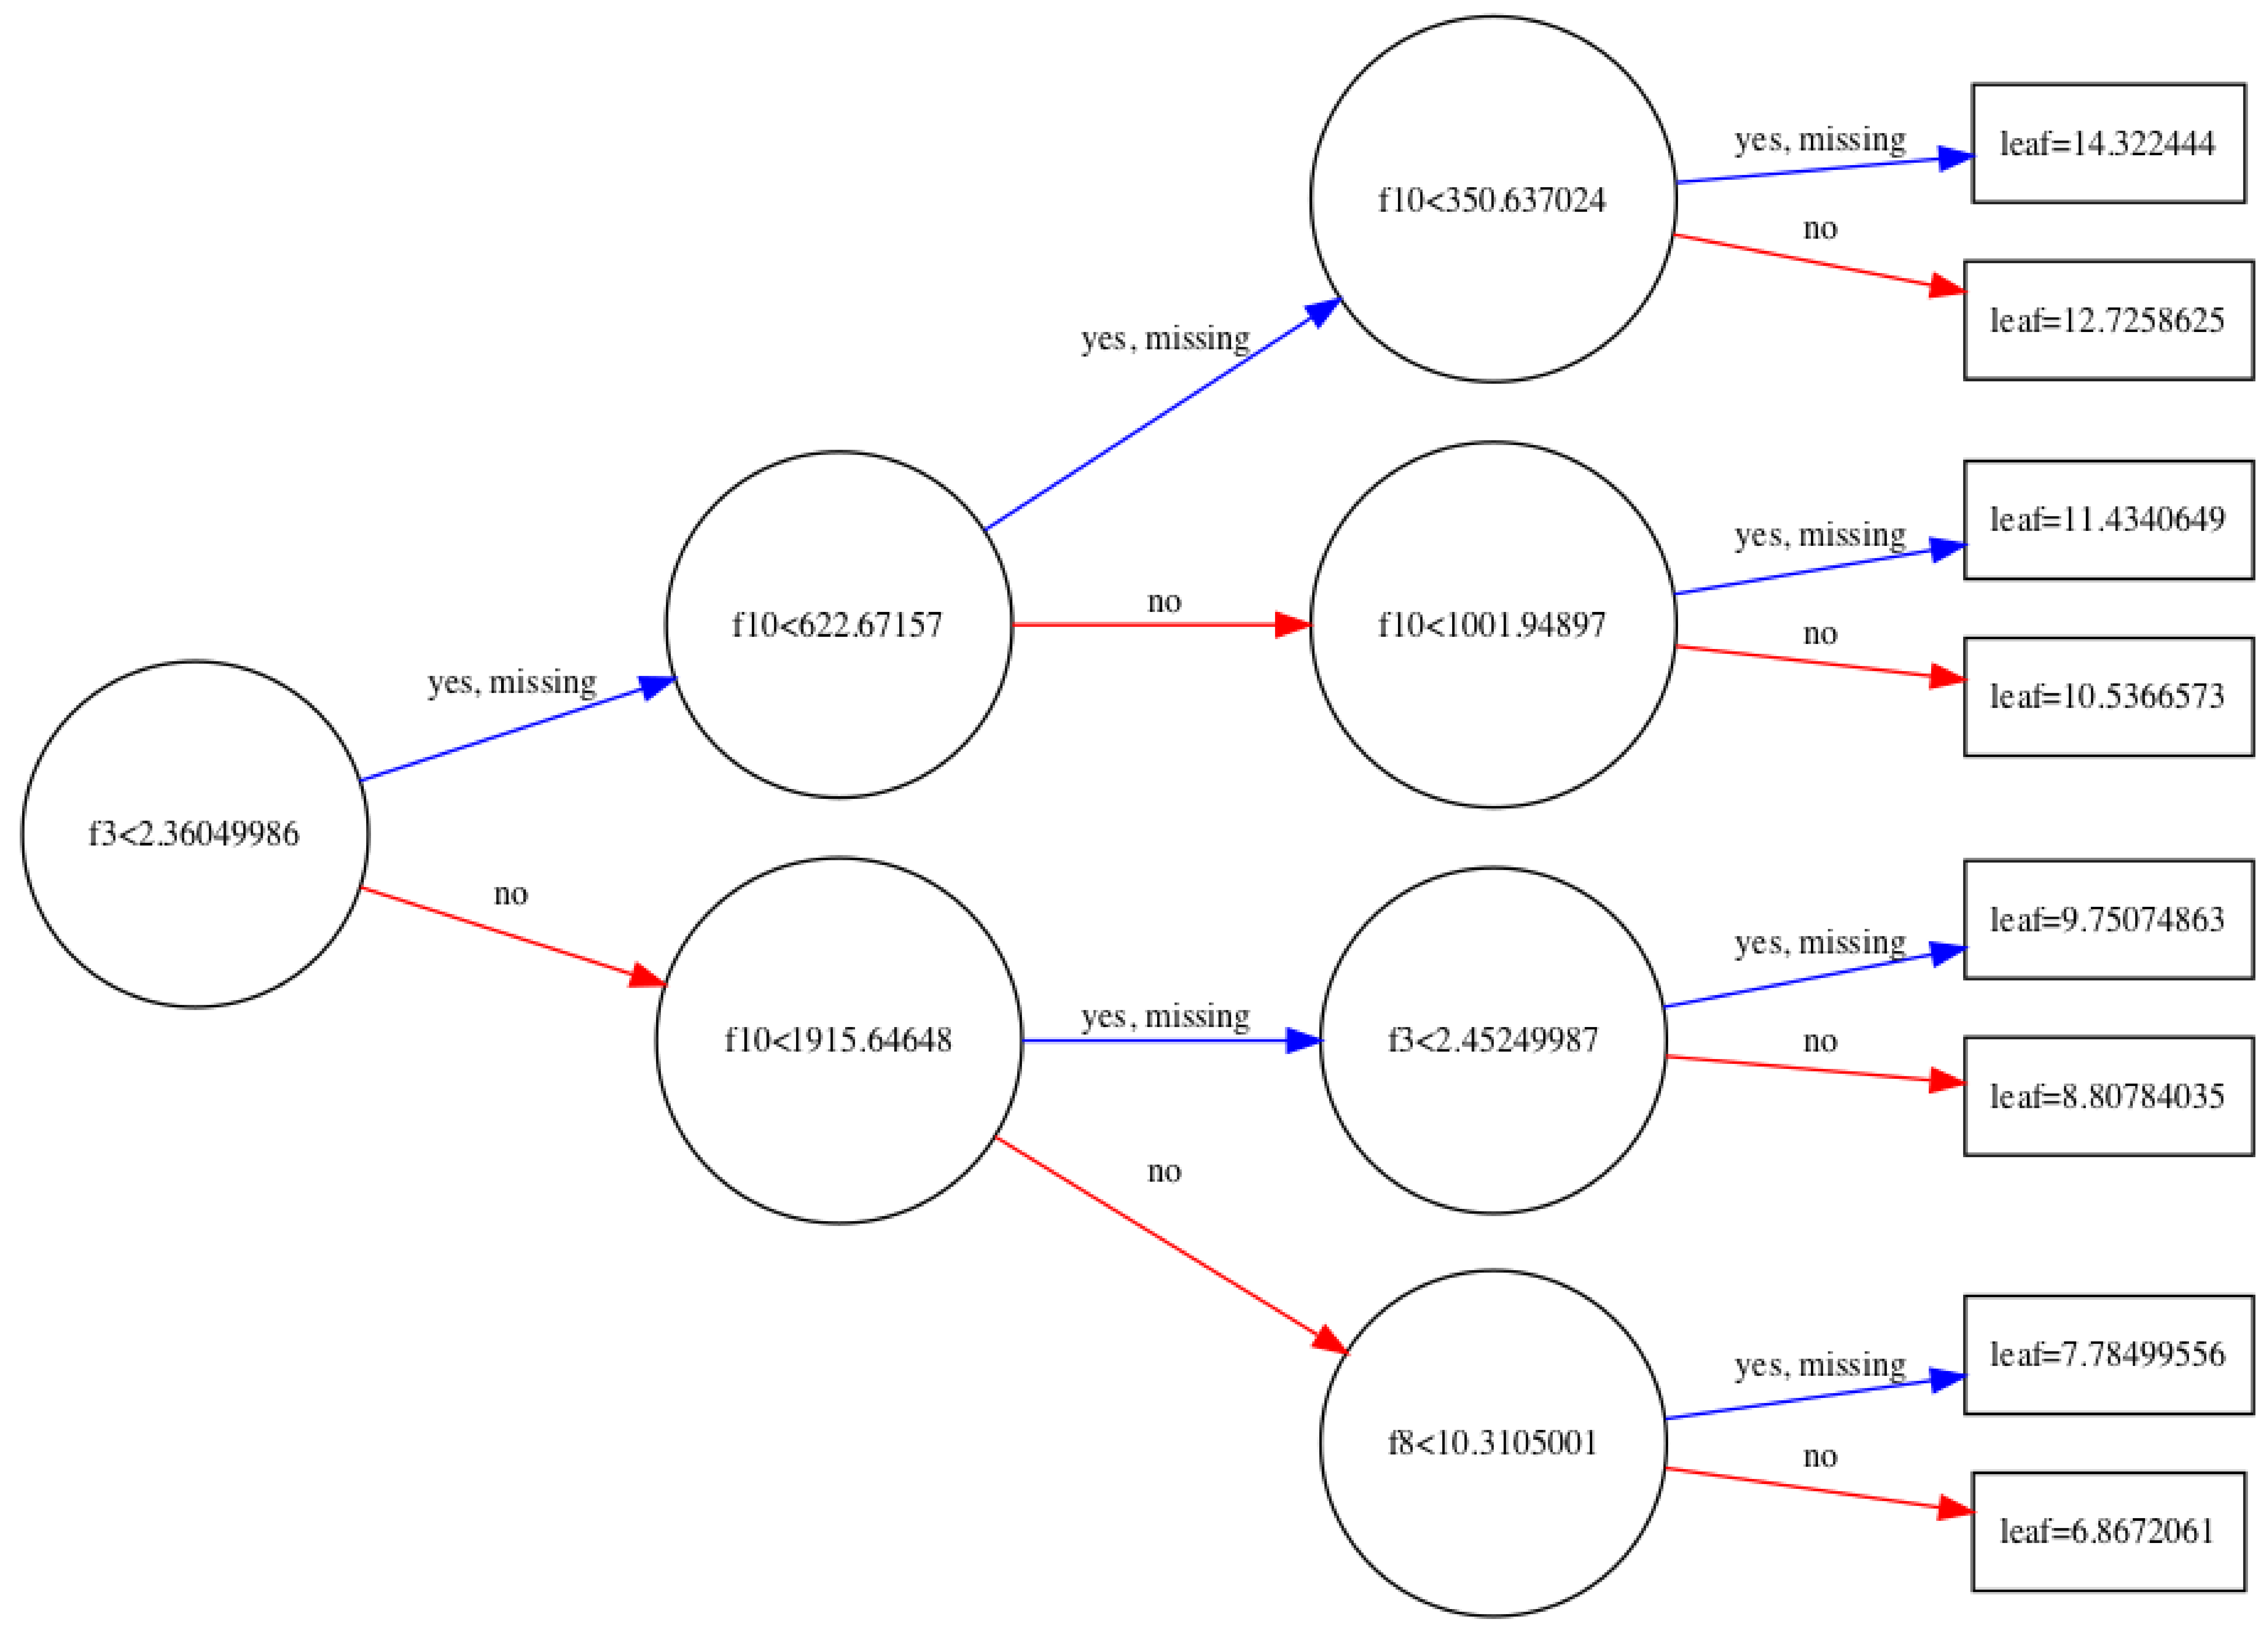

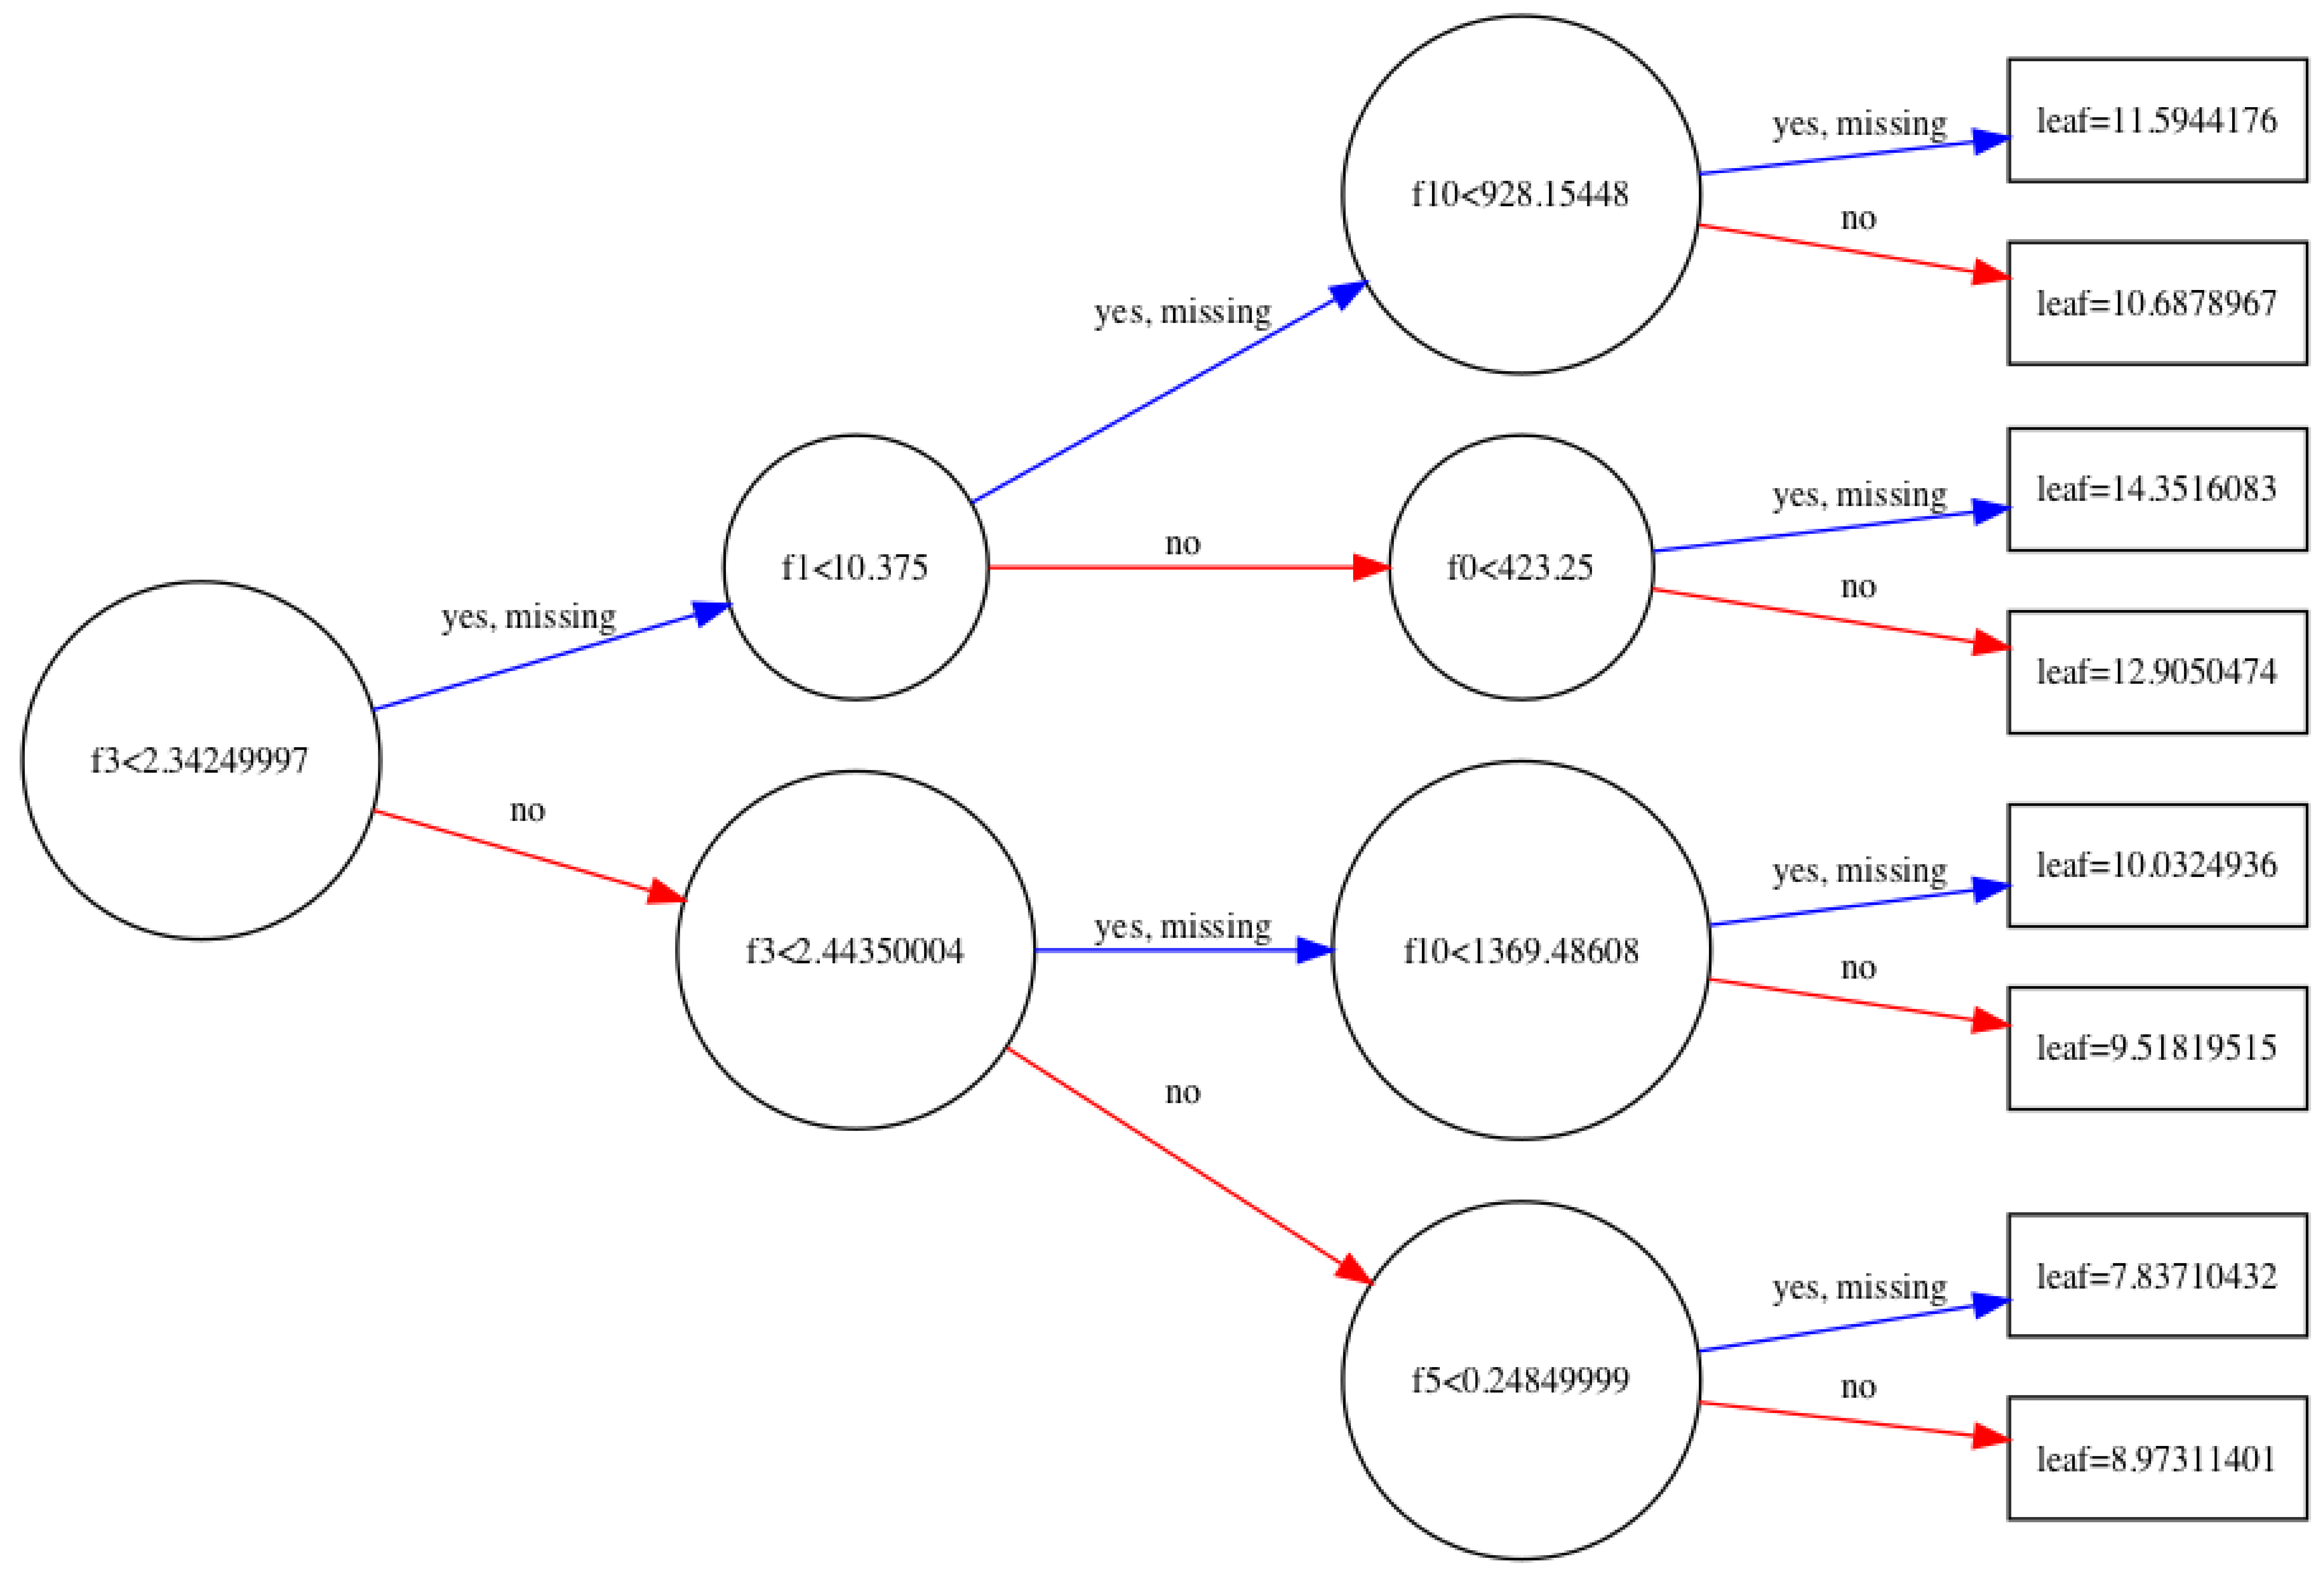

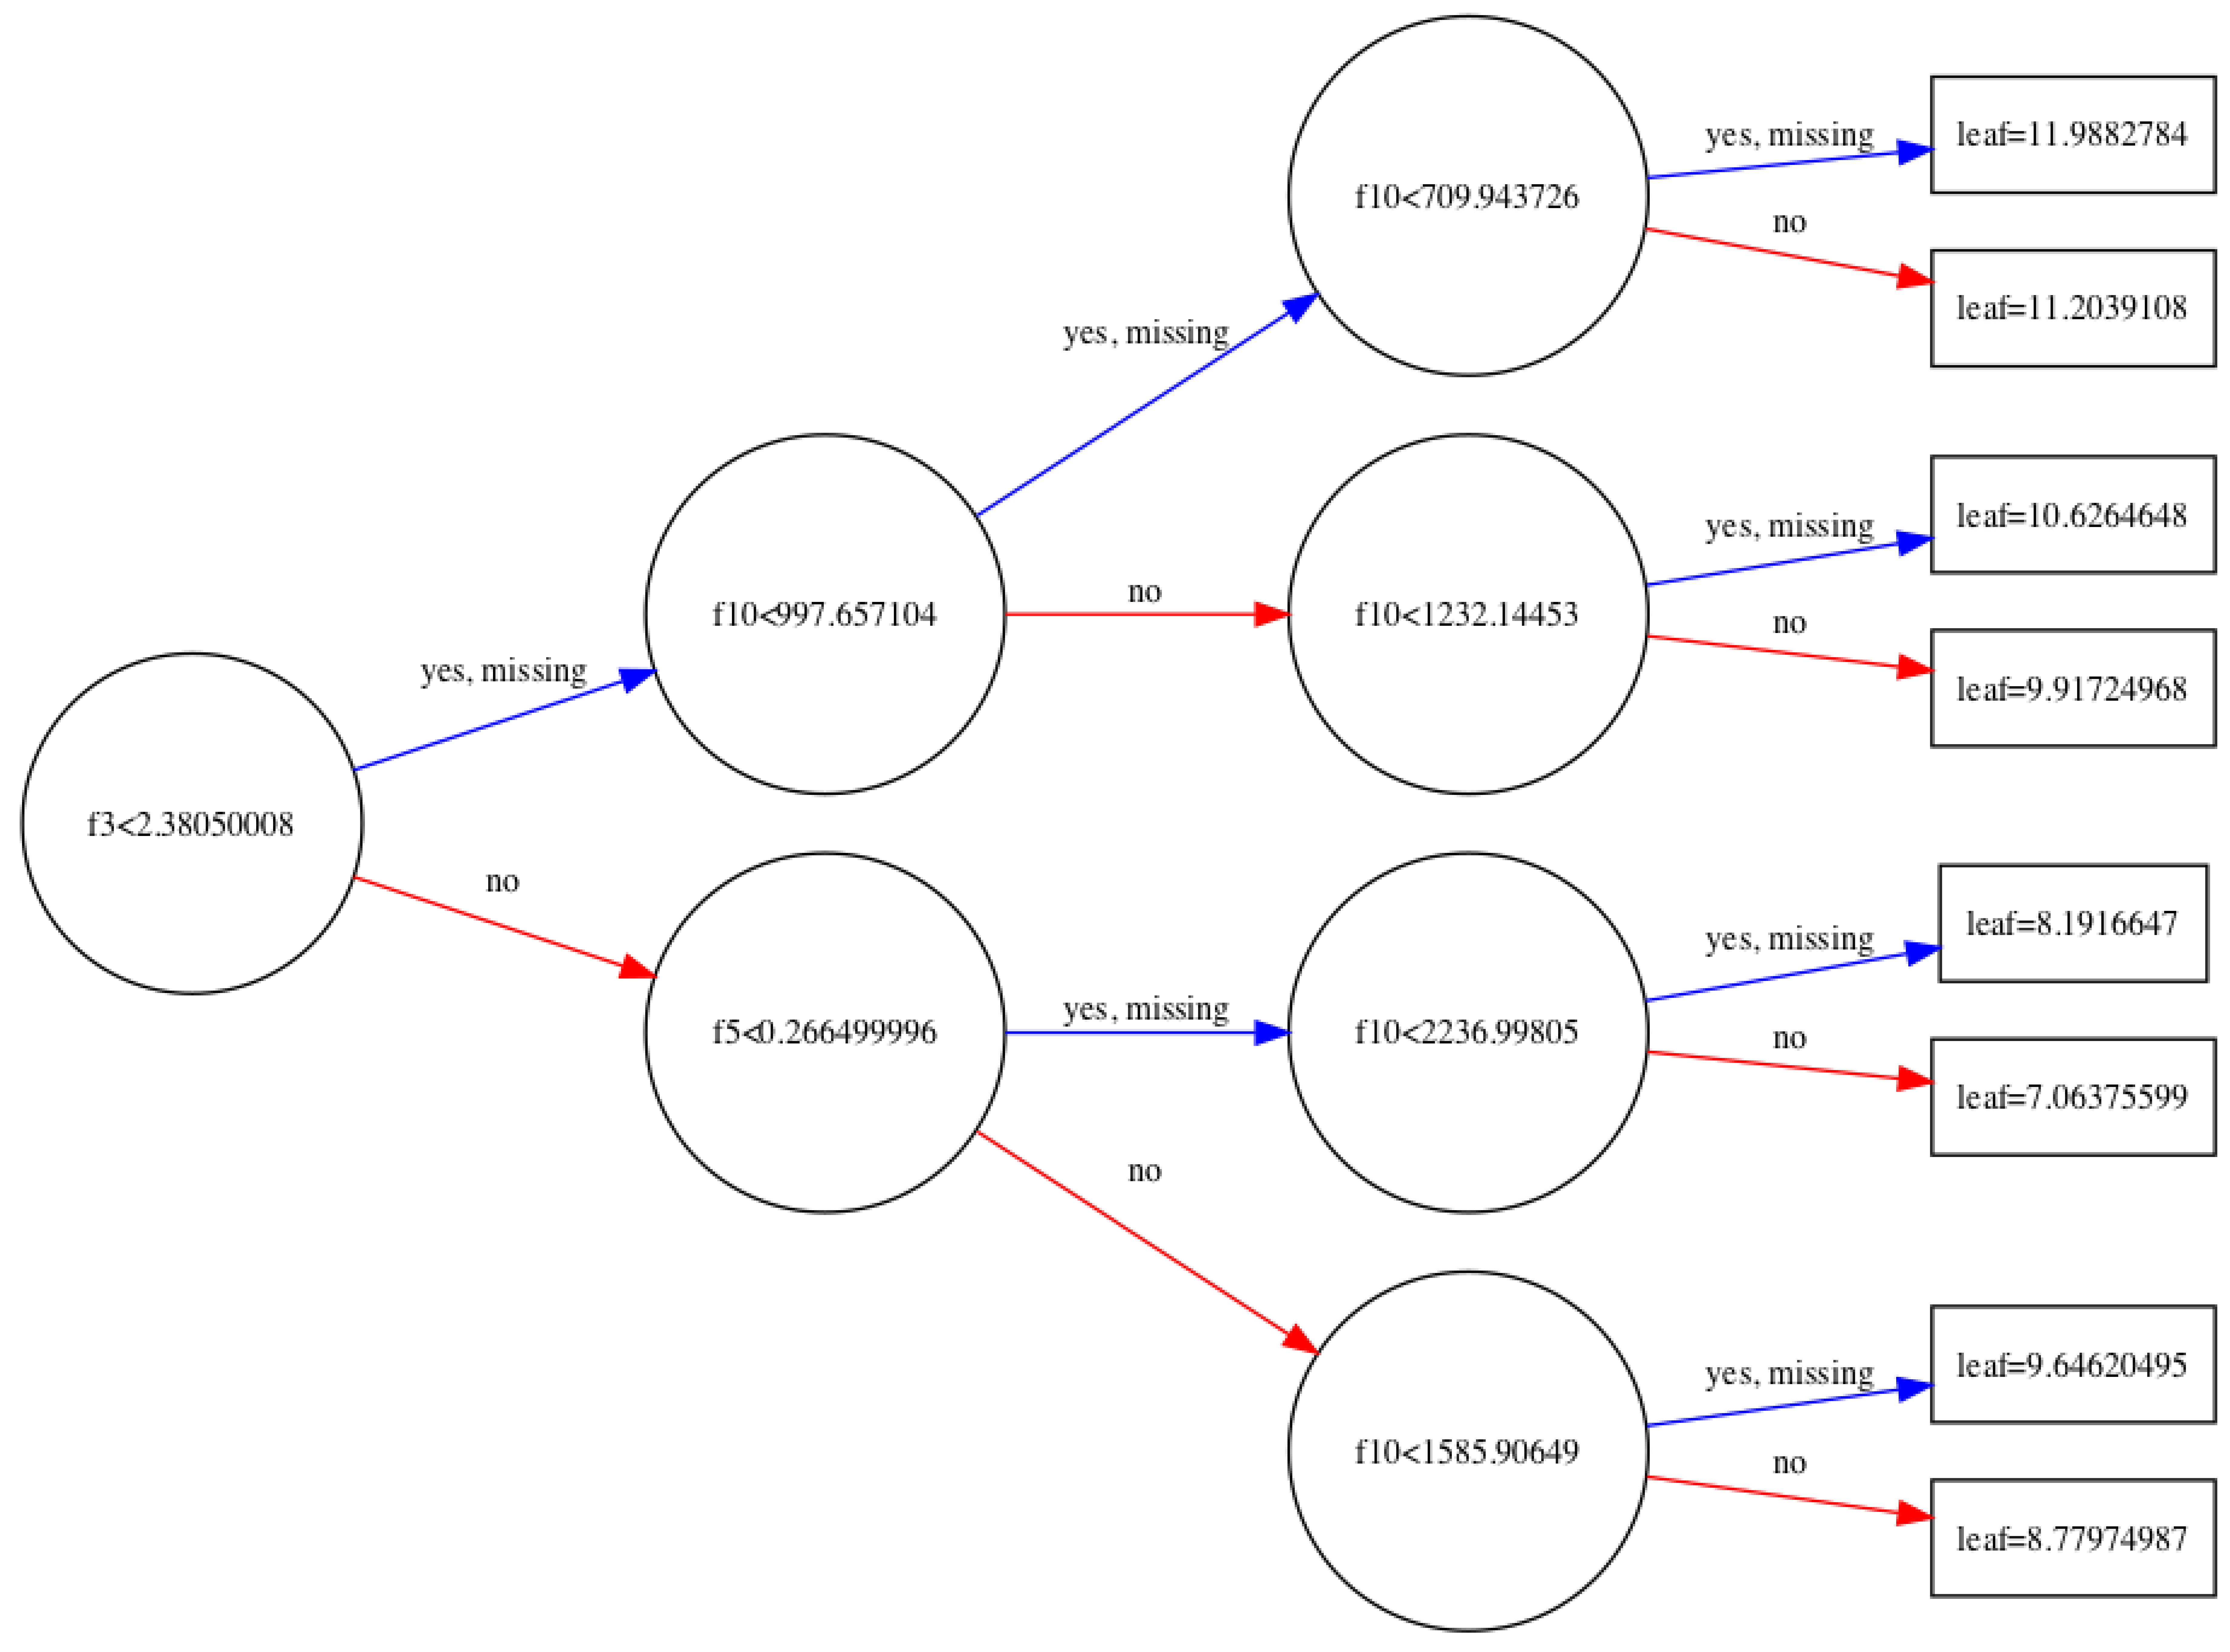

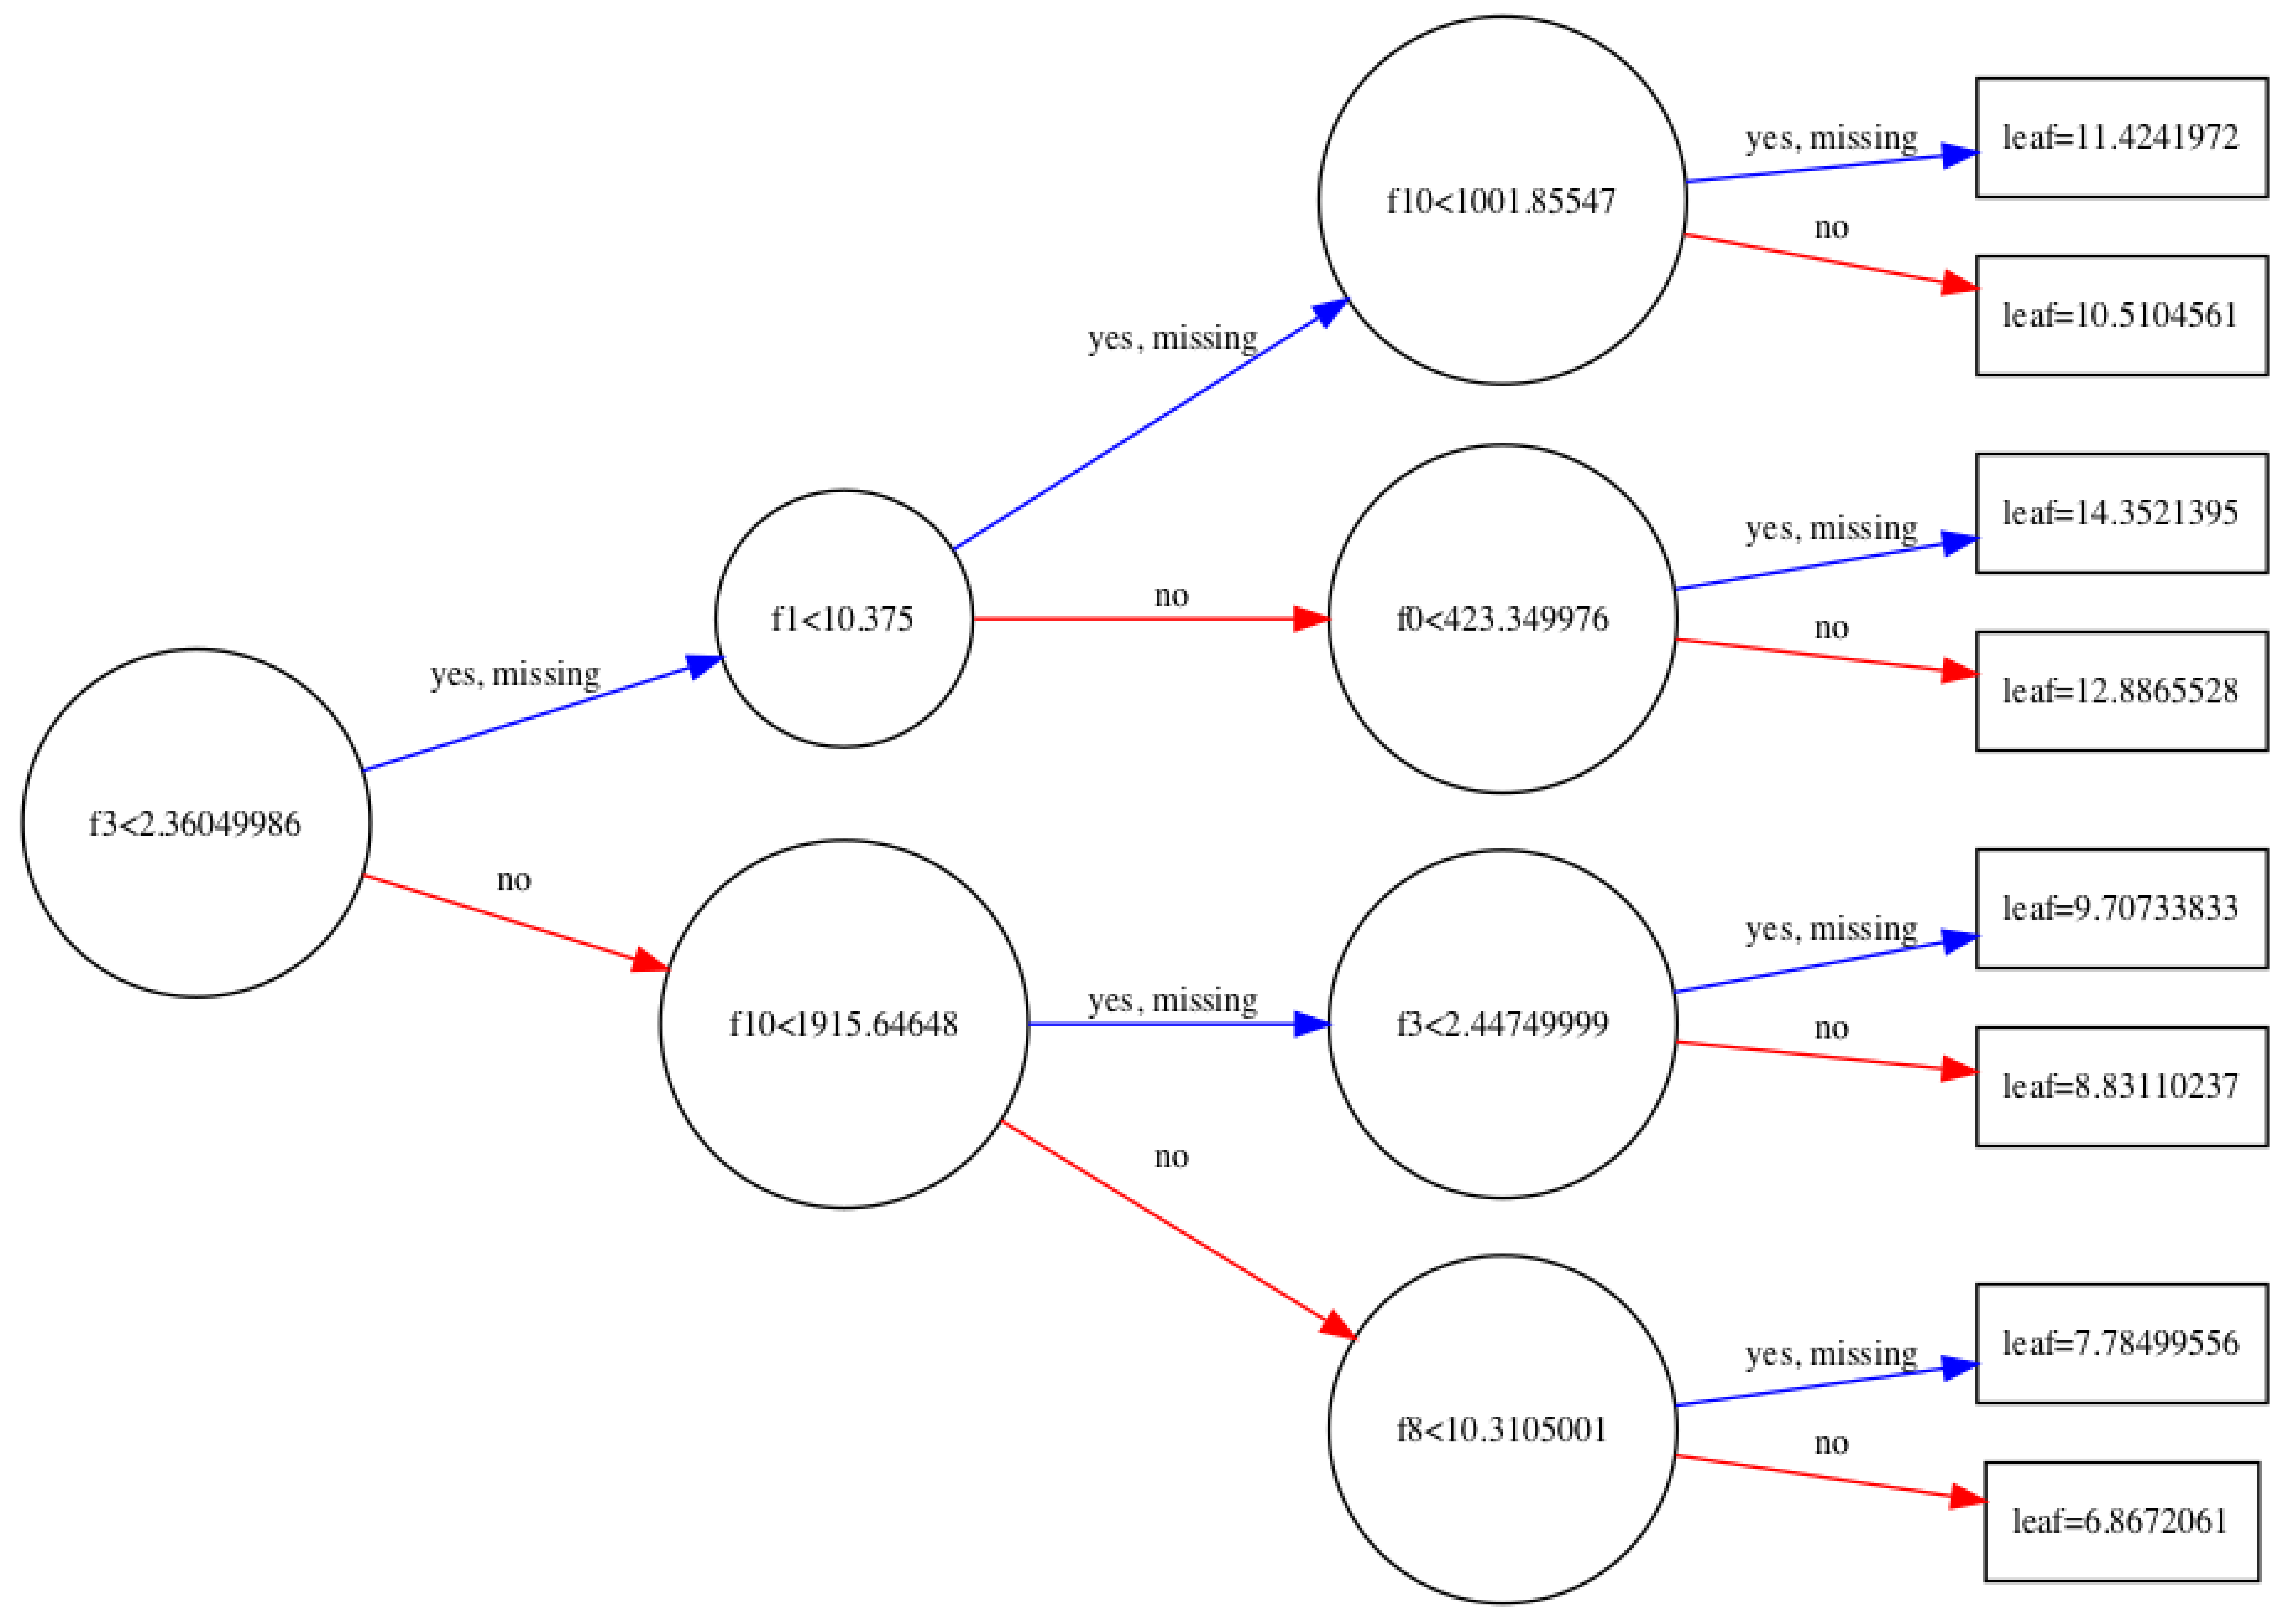

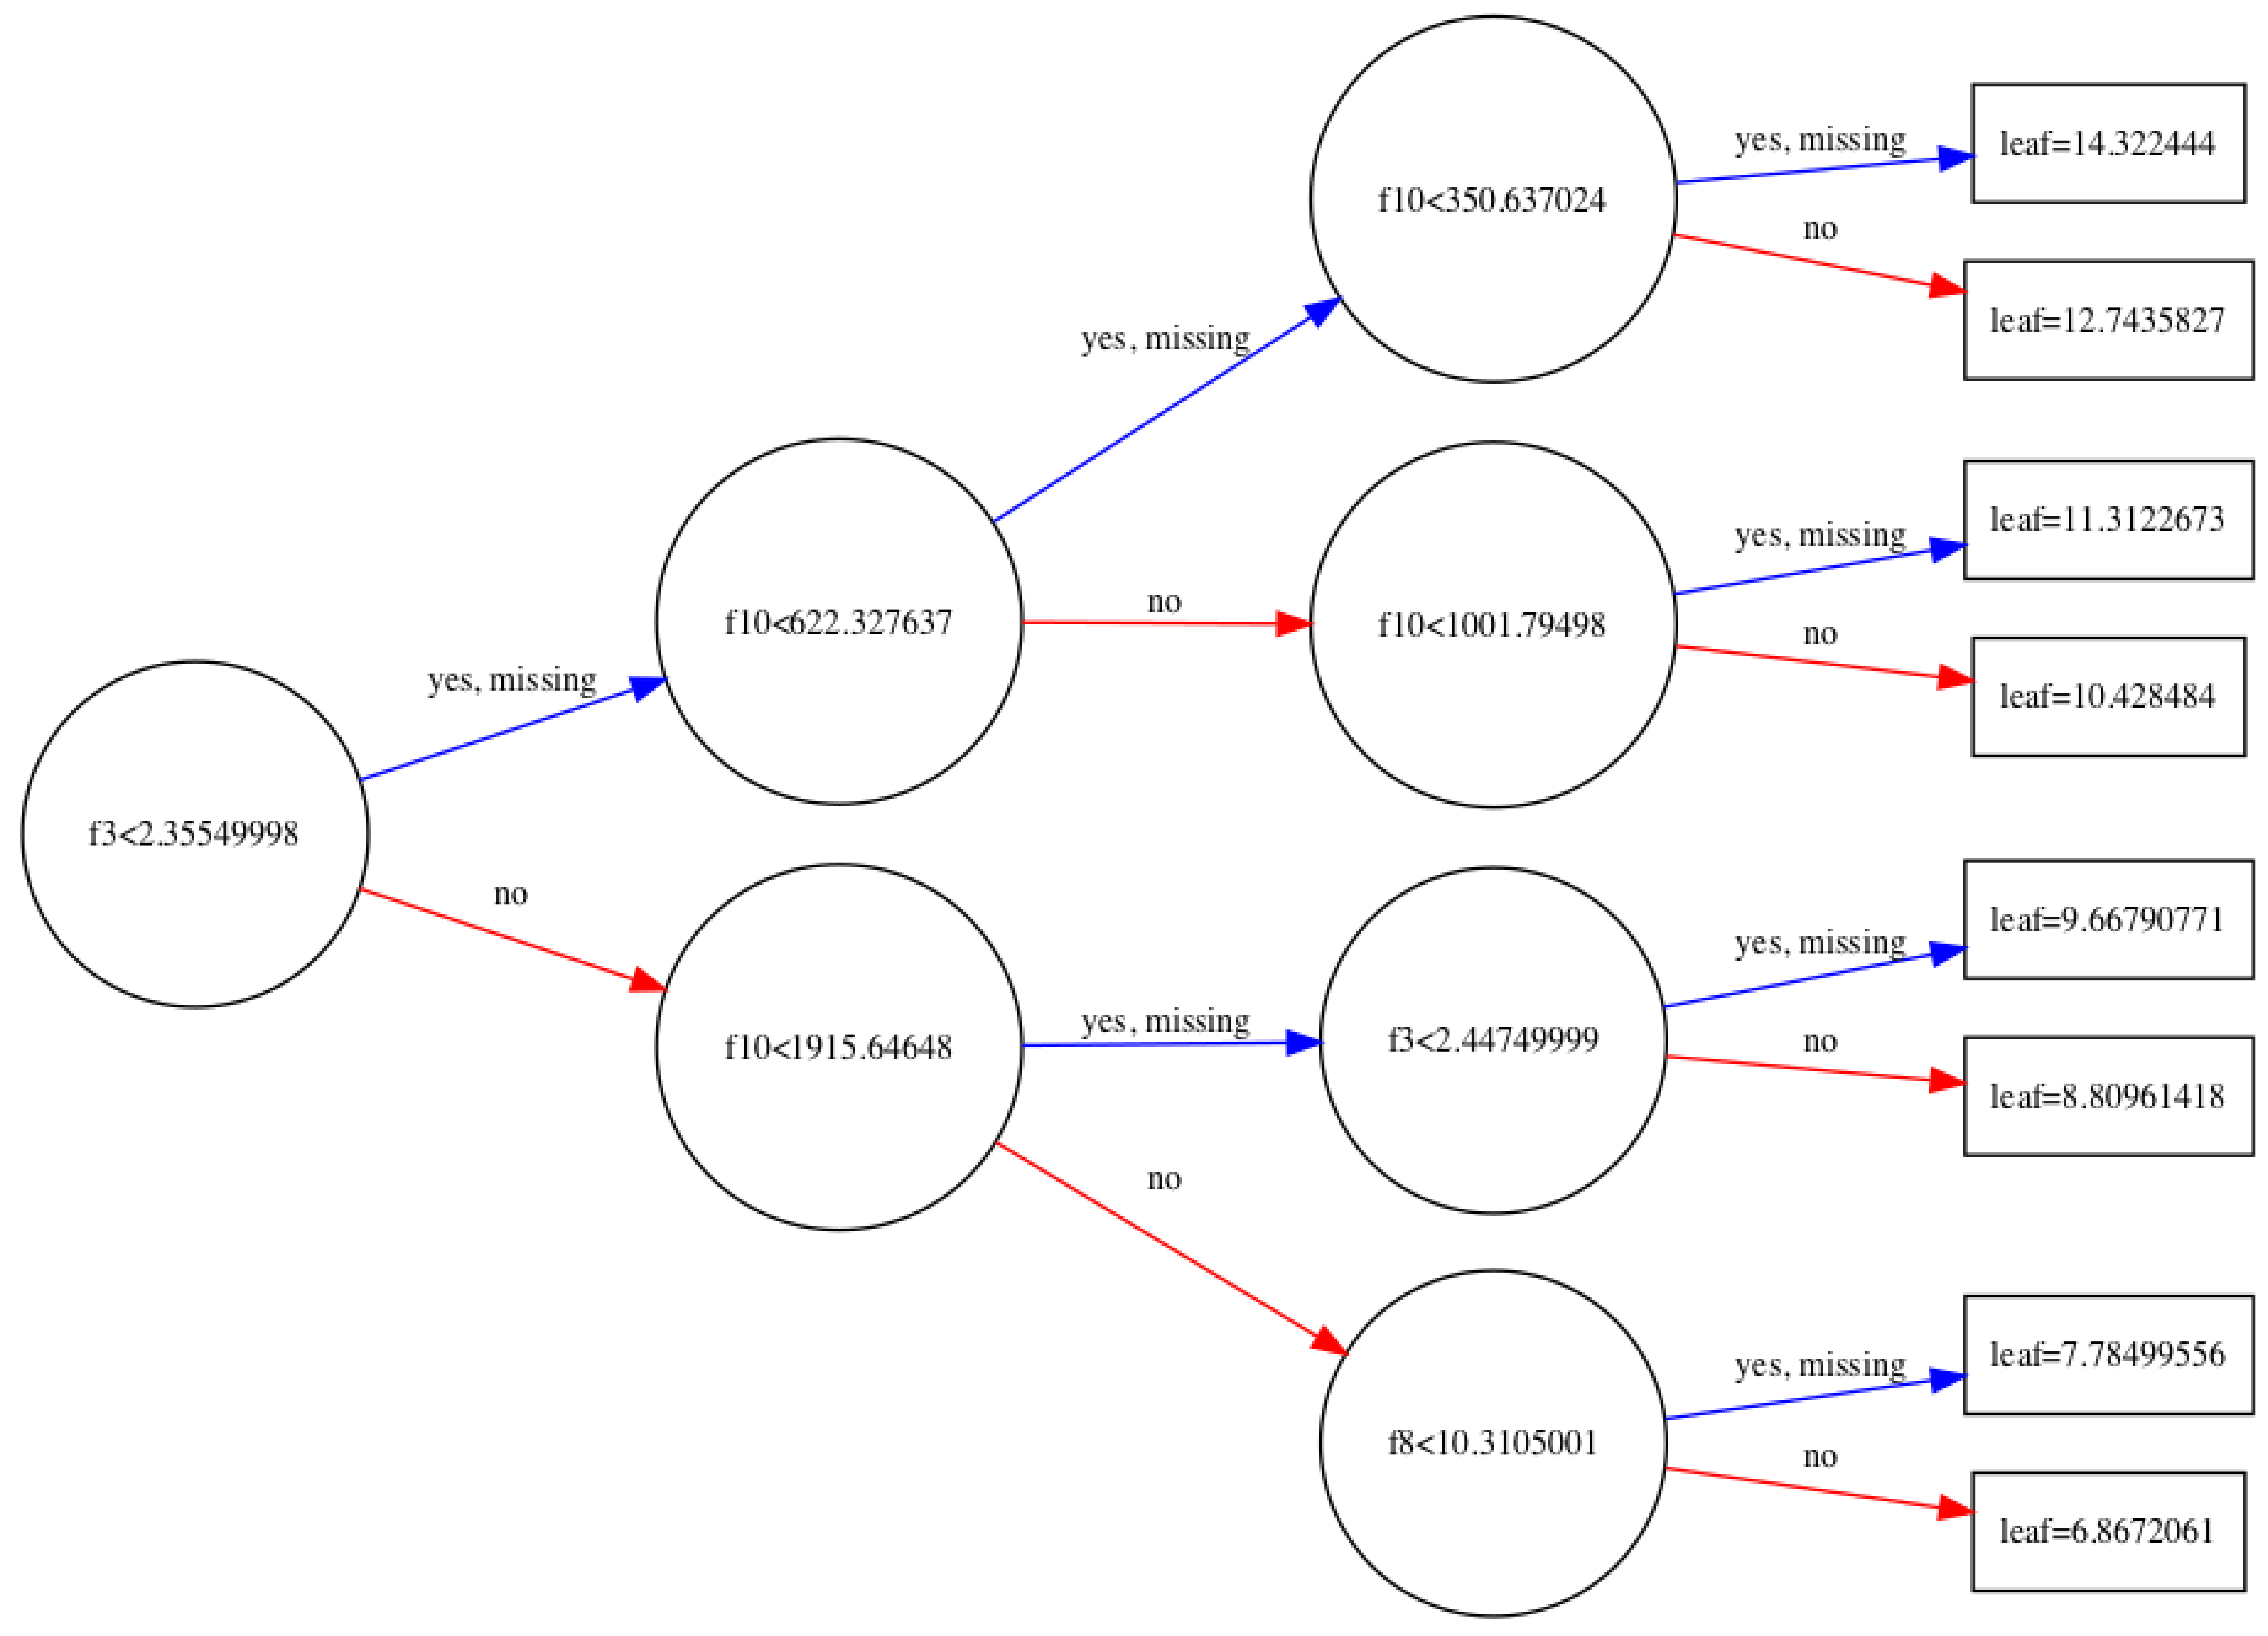

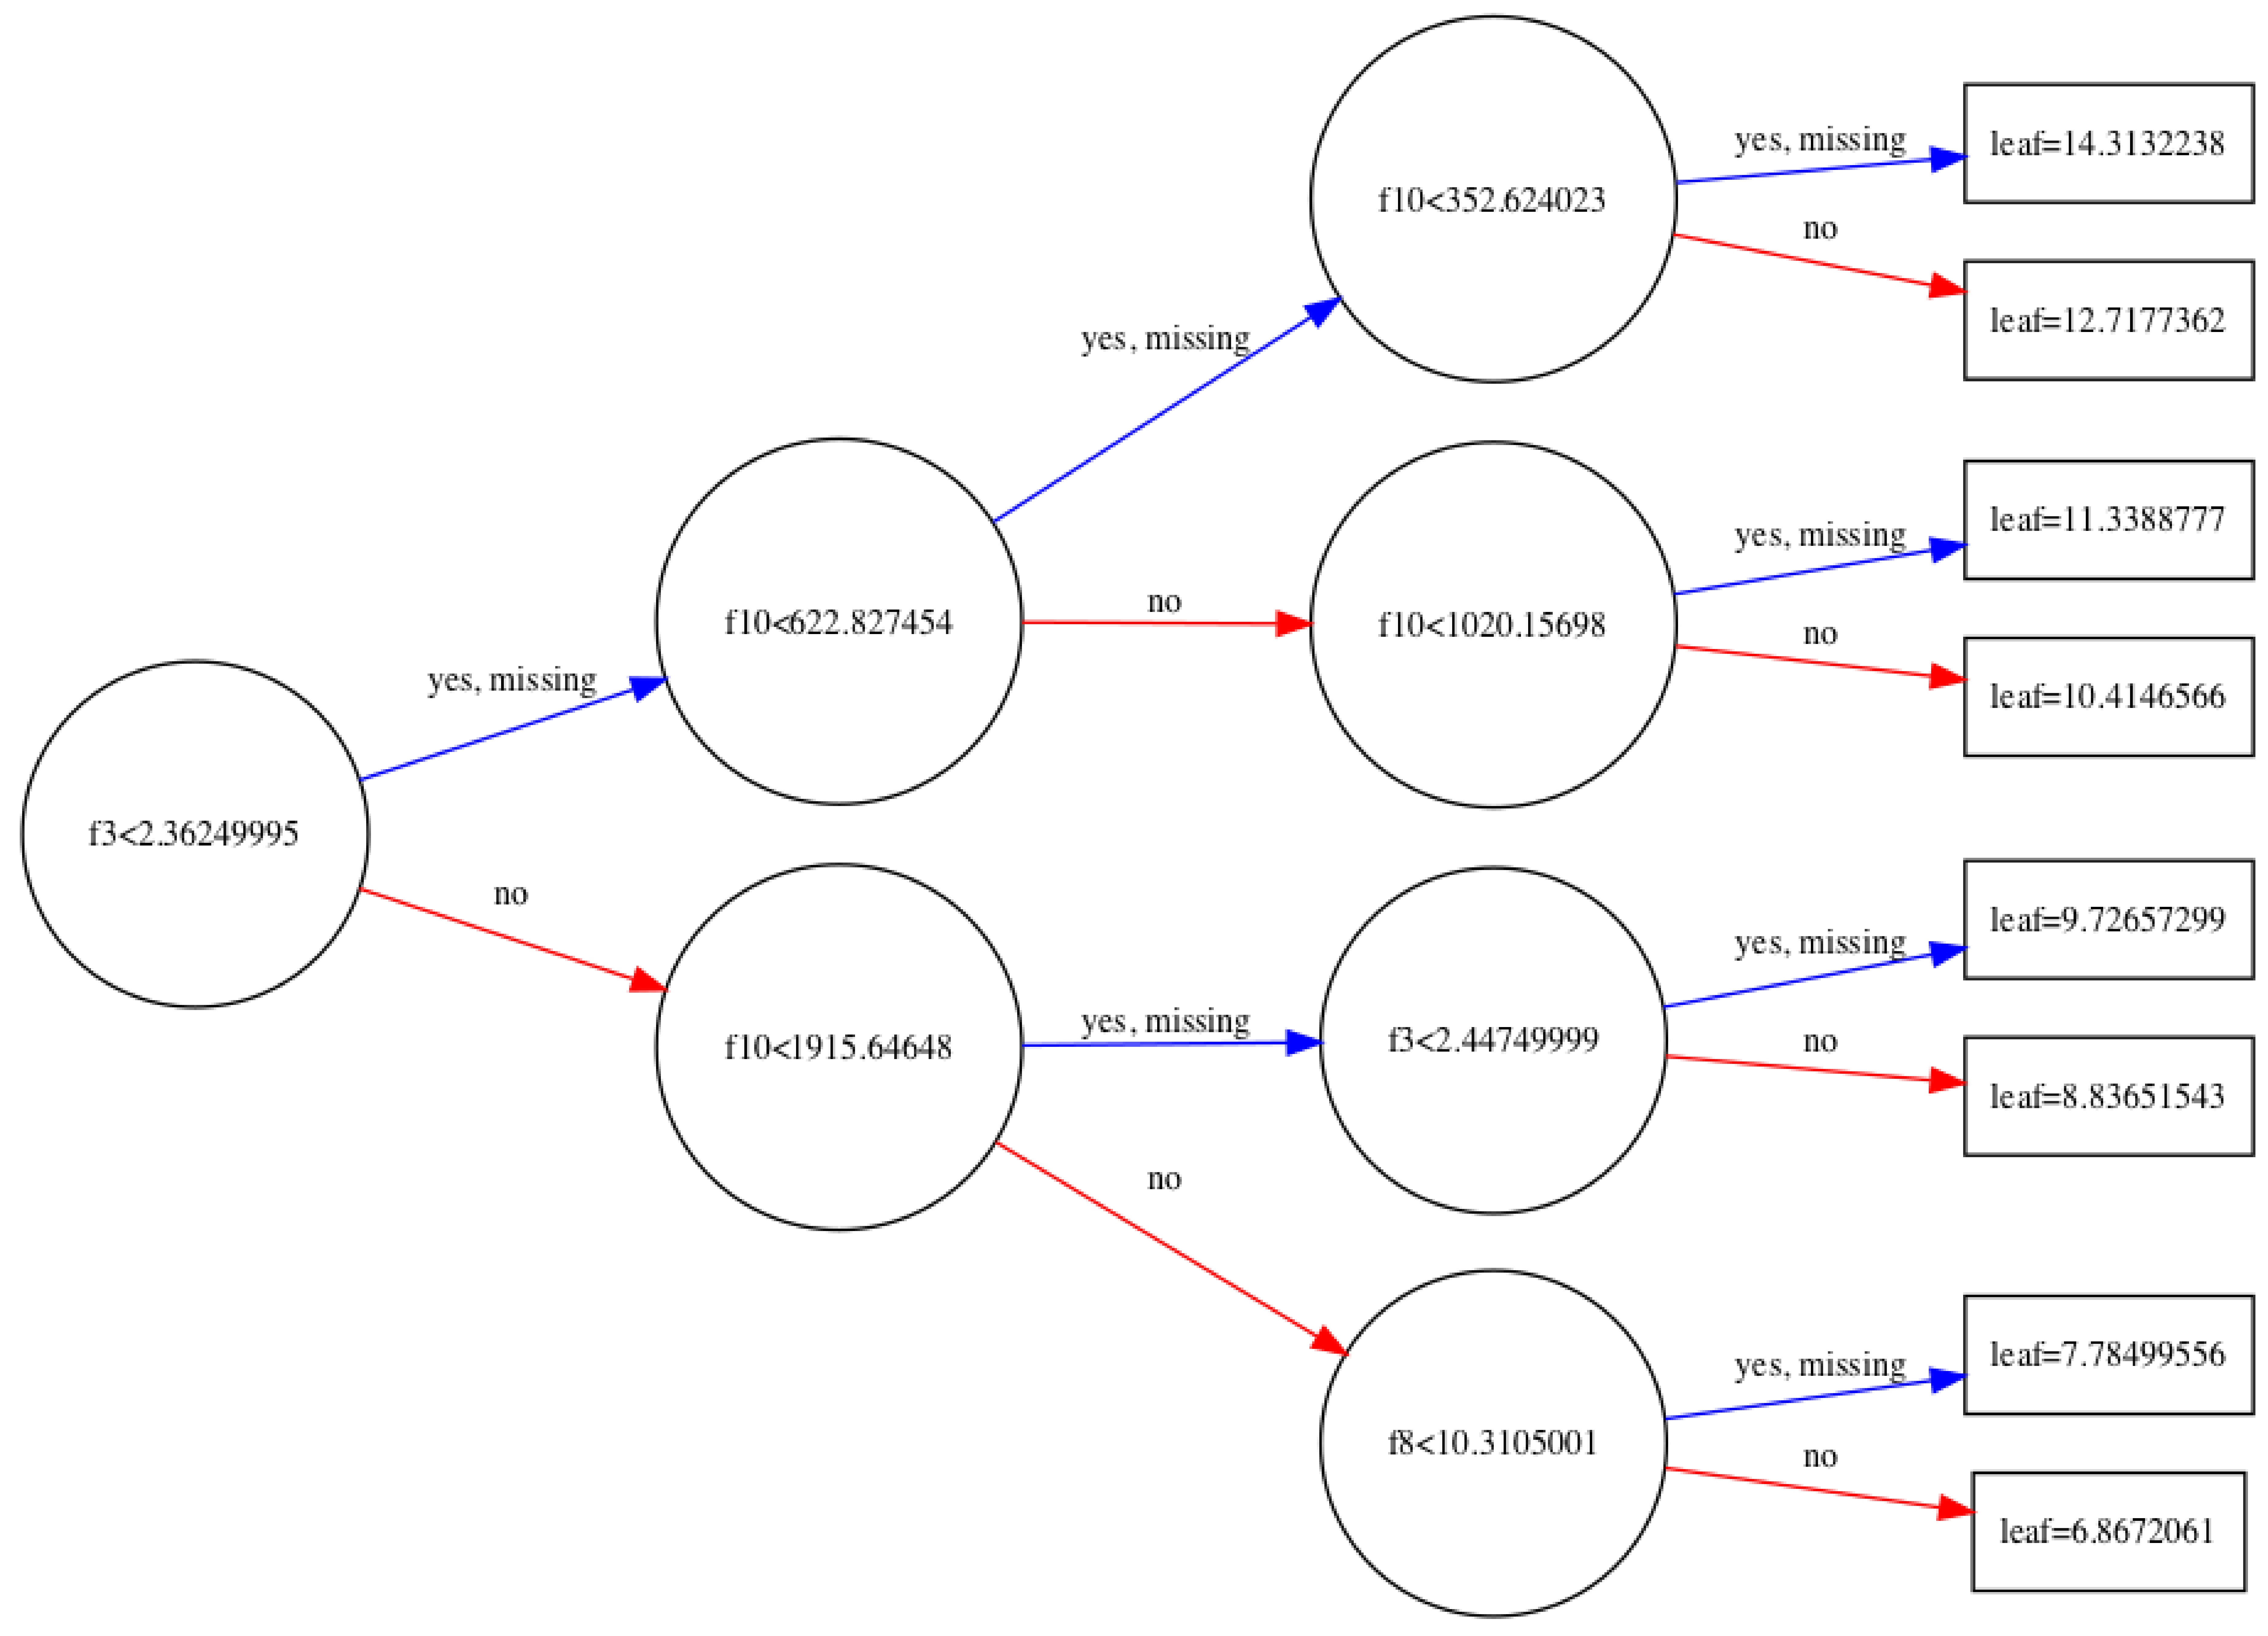

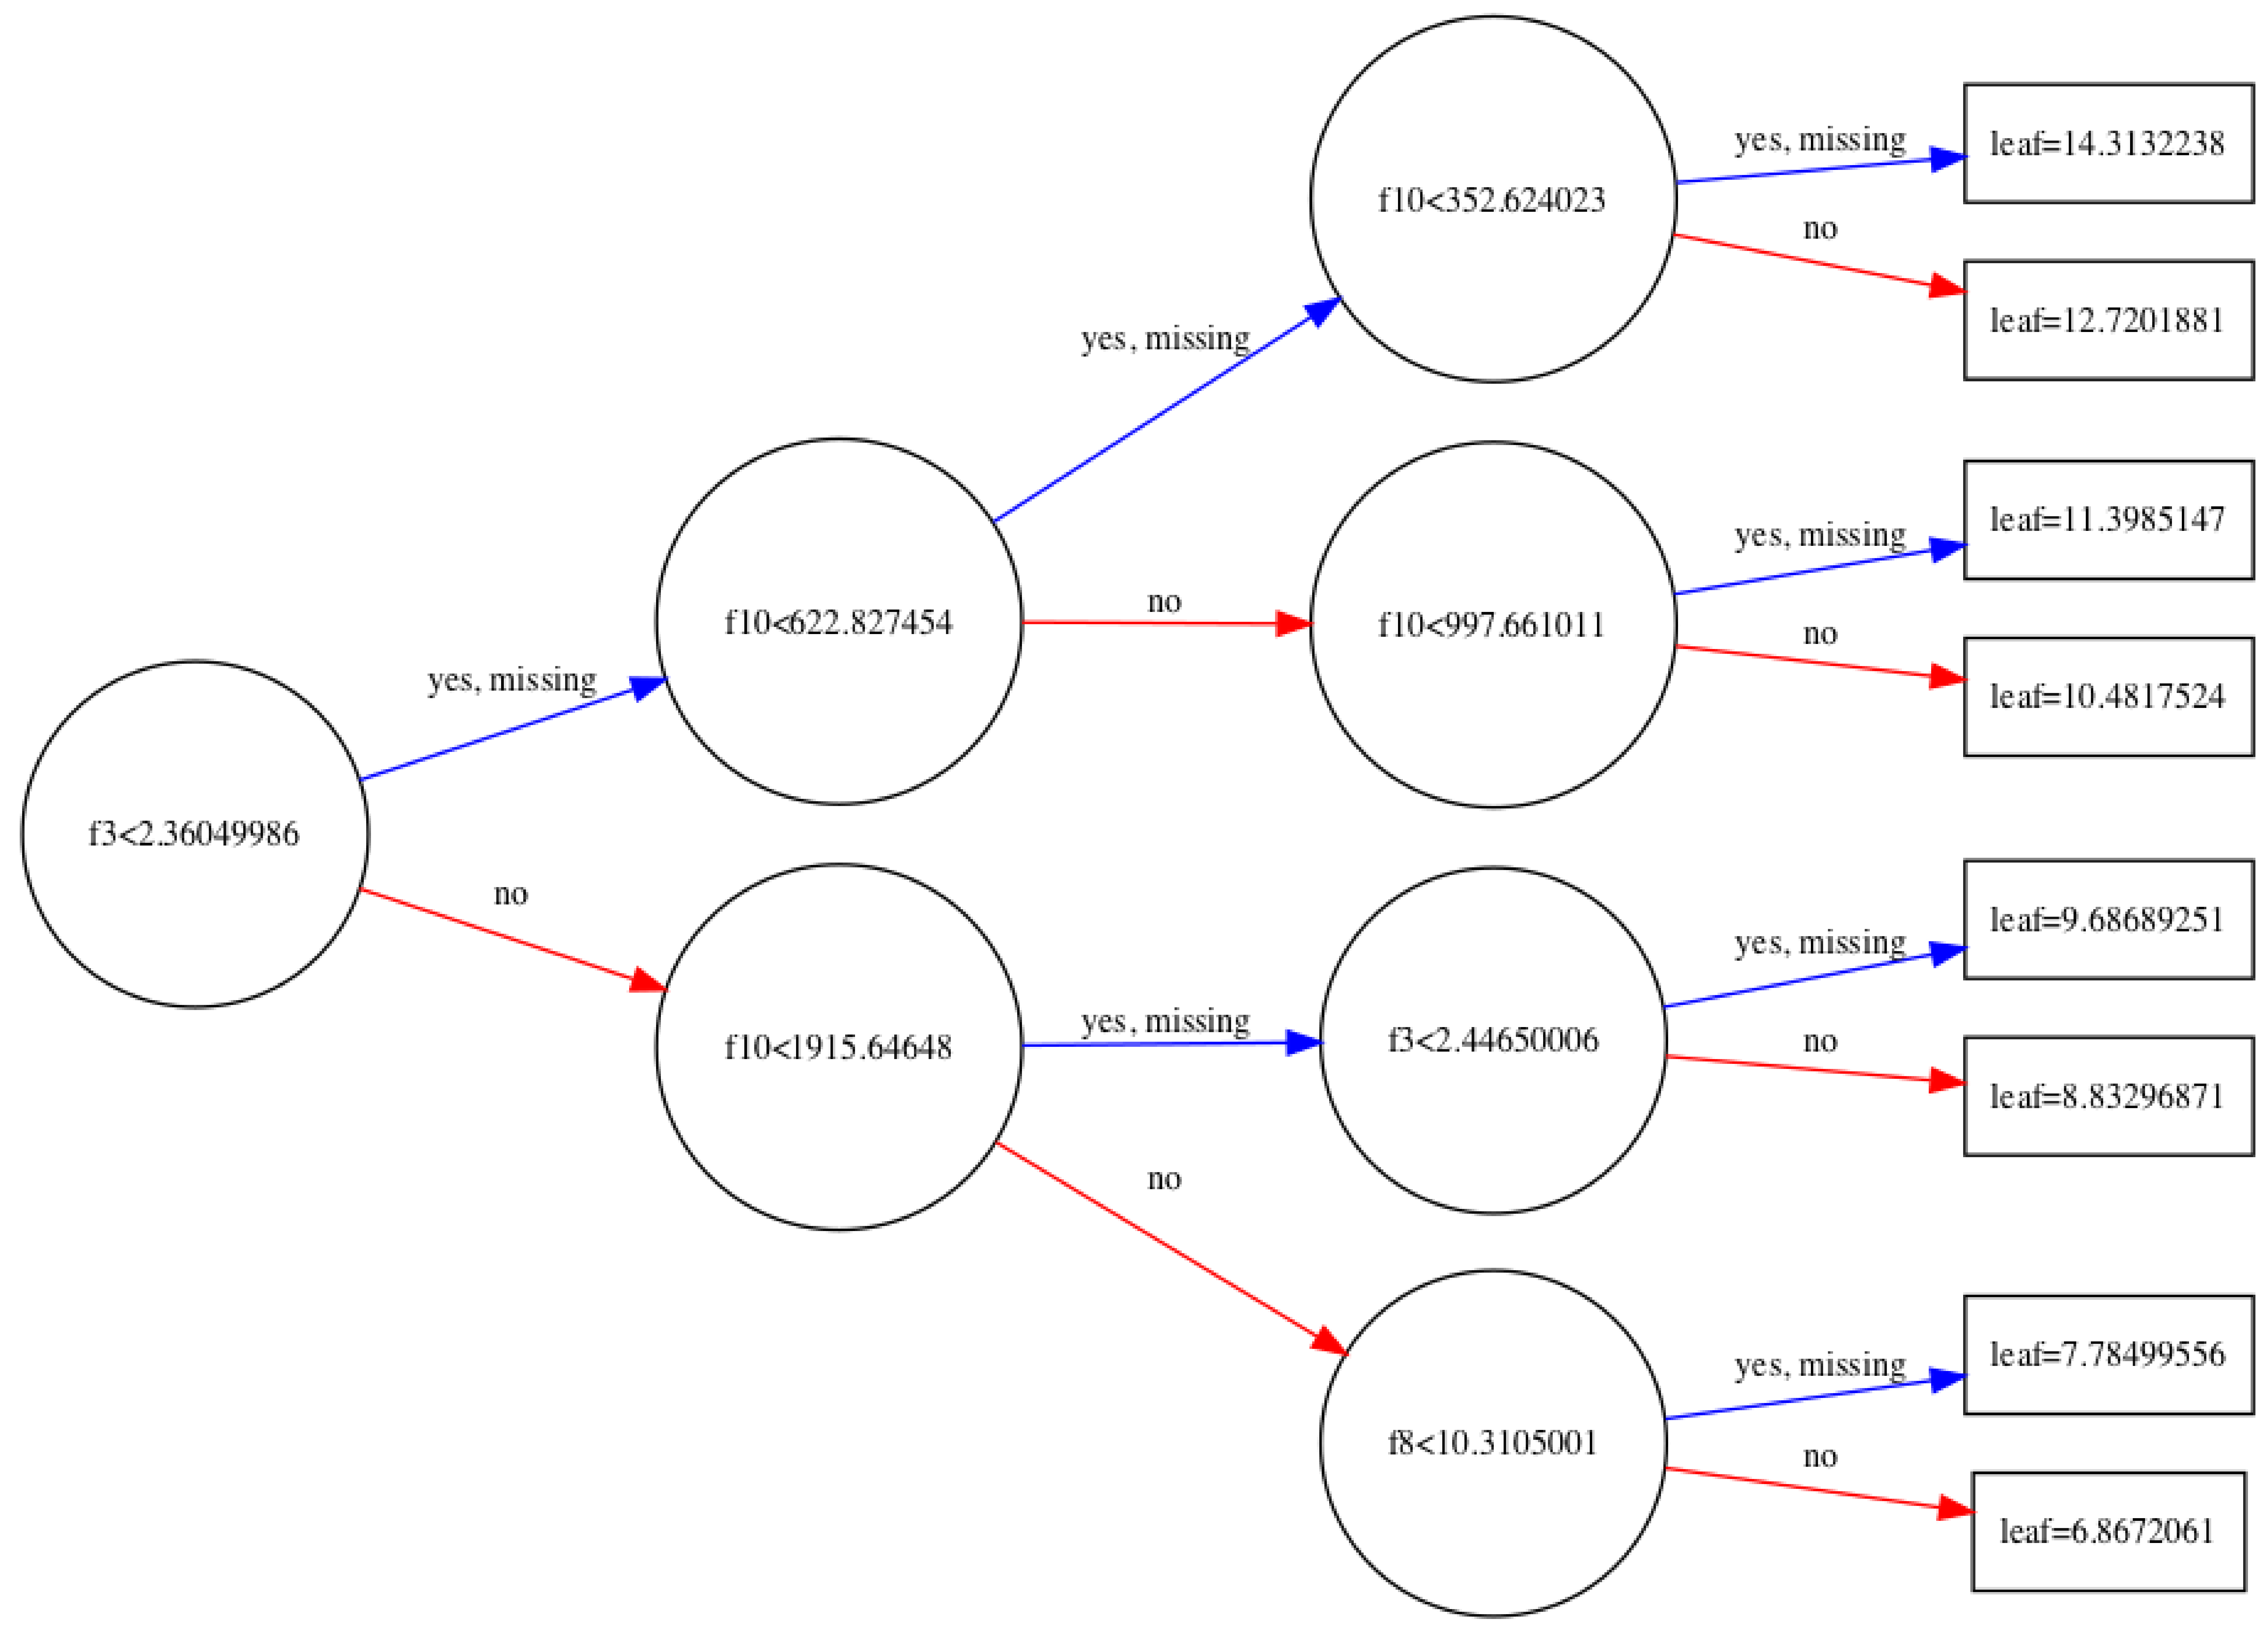

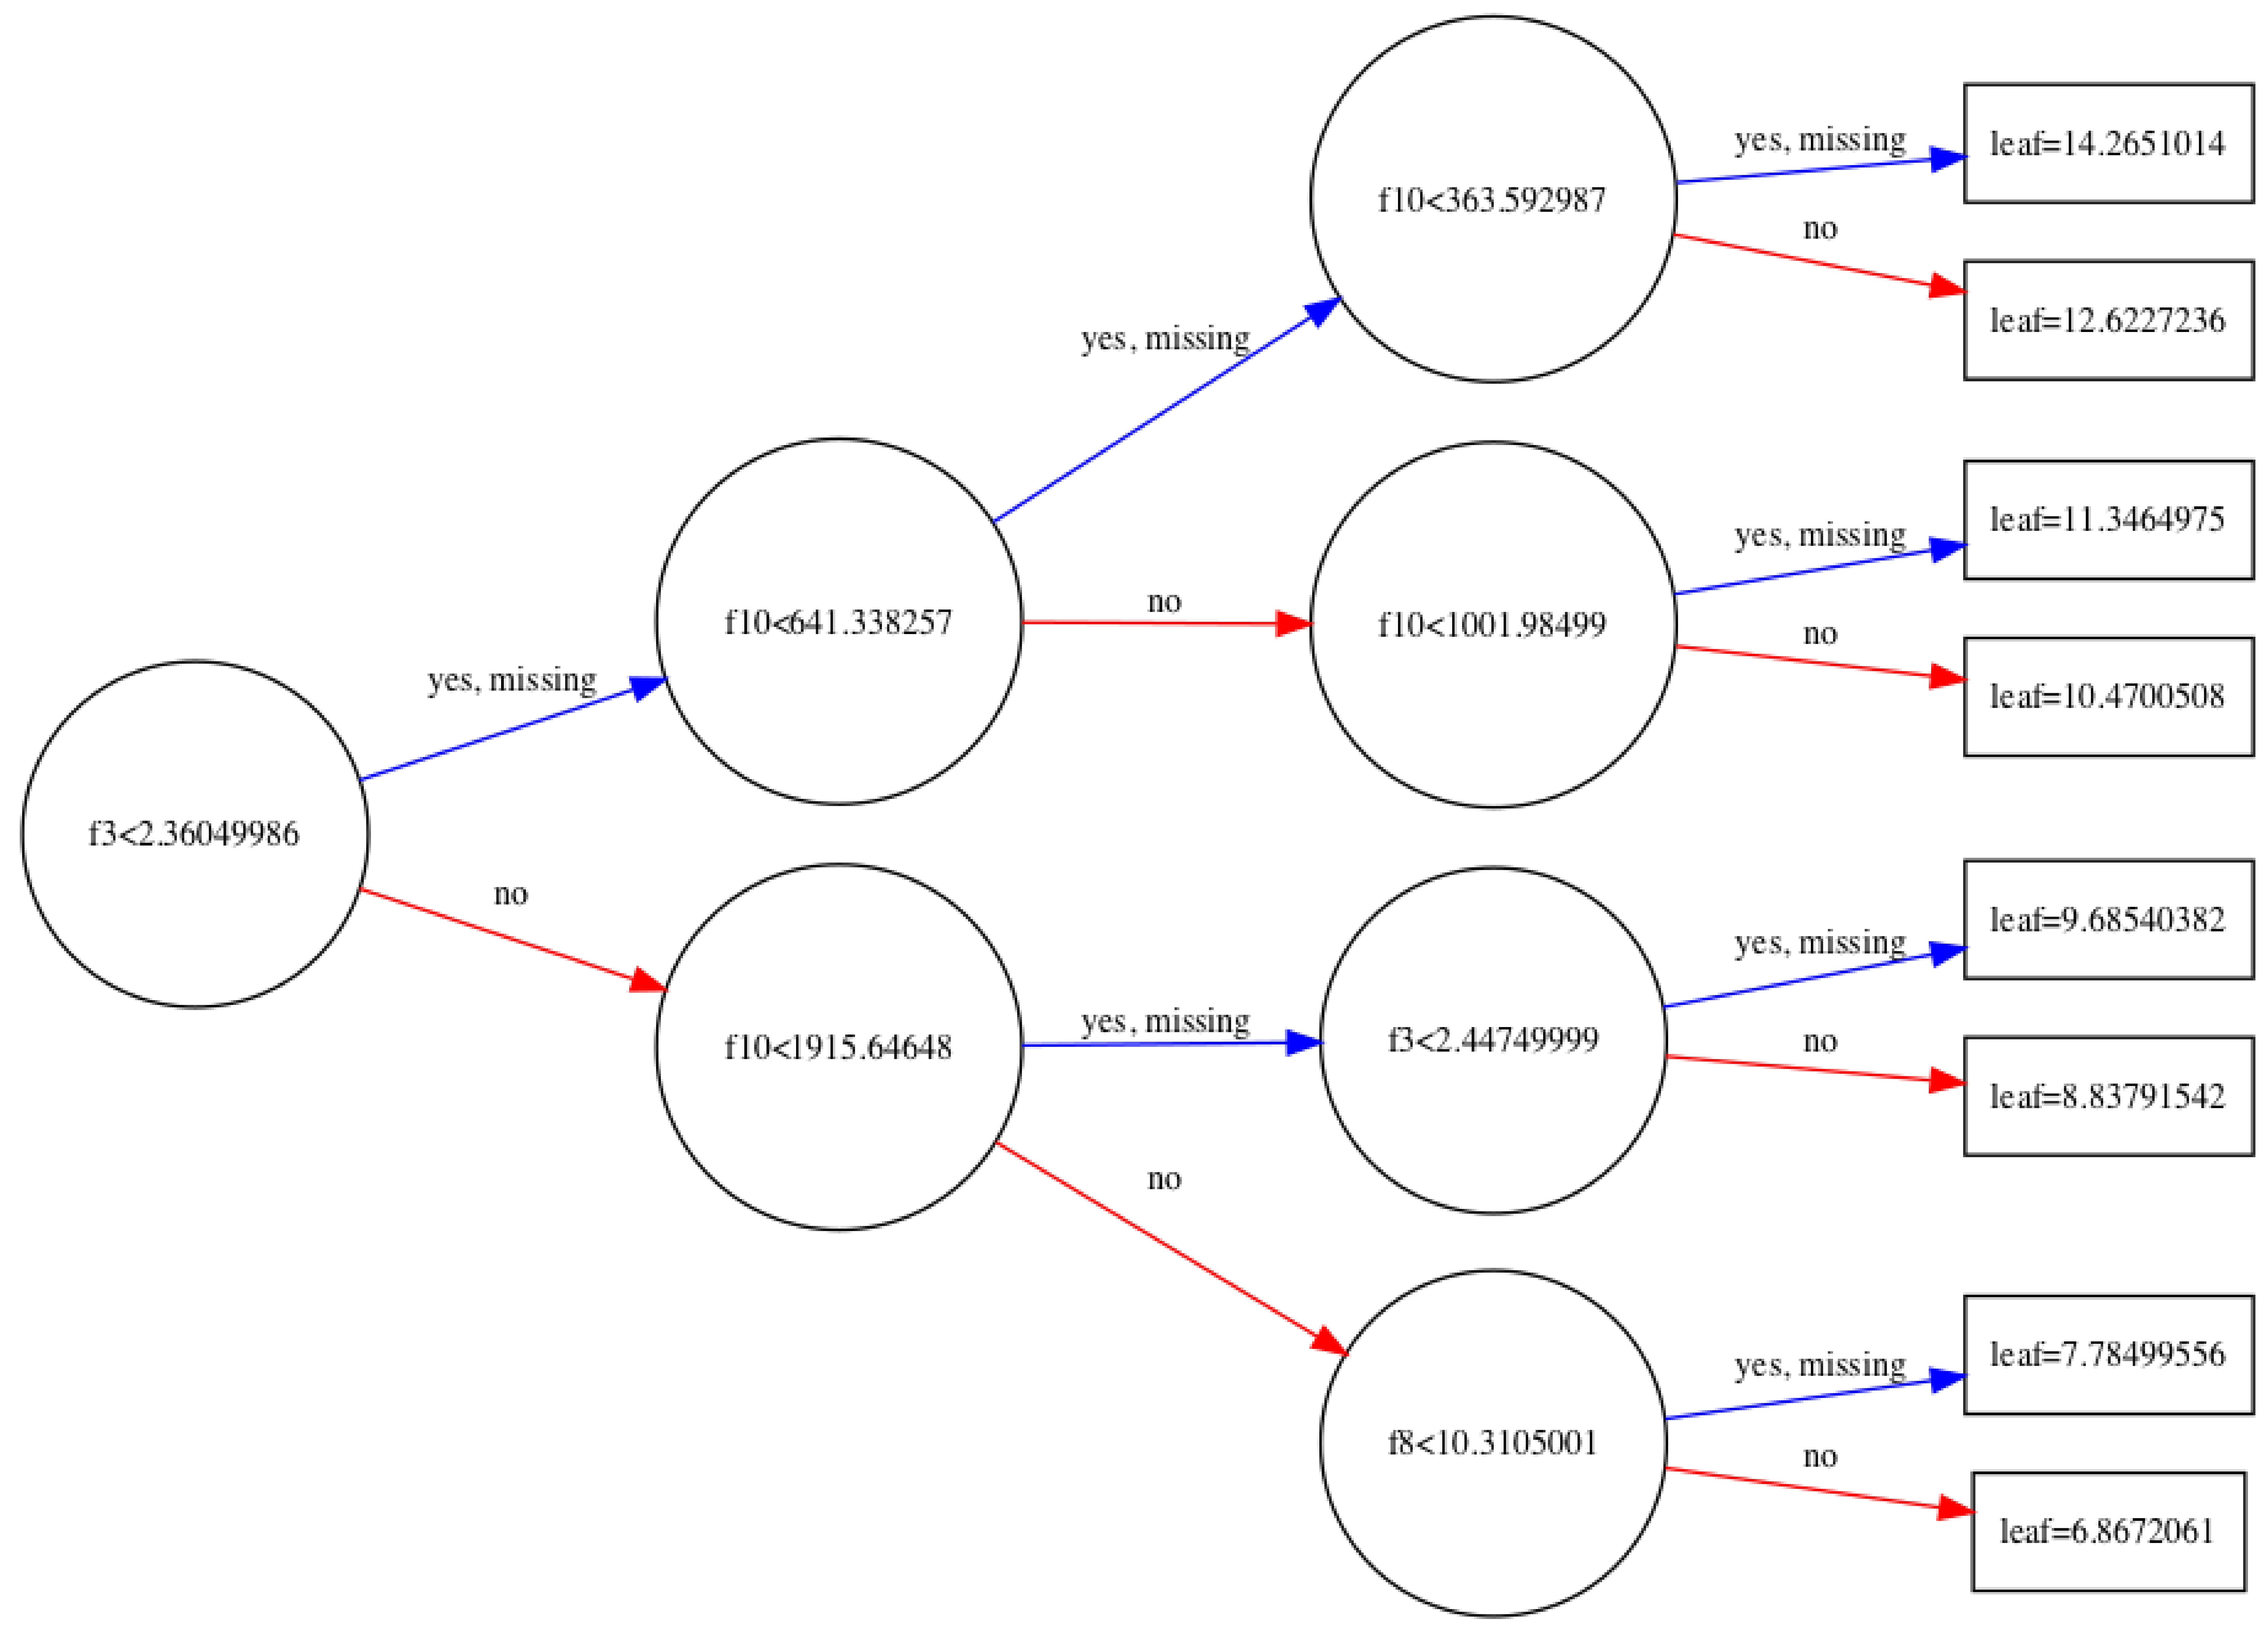

In [25]:
from xgboost import XGBRegressor

cross_val(XGBRegressor, 'xgbr')

In [23]:
import graphviz